### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../utils")
from split_utils import get_features_data


### Load Labeled Data


In [2]:
# load labeled data
labeled_data_path = pathlib.Path("../0.download_data/data/labeled_data.csv.gz")
labeled_data = get_features_data(labeled_data_path)
labeled_data


,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Frame,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,DP__efficientnet_1270,DP__efficientnet_1271,DP__efficientnet_1272,DP__efficientnet_1273,DP__efficientnet_1274,DP__efficientnet_1275,DP__efficientnet_1276,DP__efficientnet_1277,DP__efficientnet_1278,DP__efficientnet_1279
0,Large,397,618,LT0010_27,173,1,83,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,RAB21,...,1.526493,-0.388909,-0.715202,-0.939279,-0.077689,1.965509,18.685819,0.061676,2.641369,-0.086854
1,Large,359,584,LT0010_27,173,1,83,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,RAB21,...,-0.482883,-1.354858,-0.856680,-0.934949,0.725091,2.255450,-0.565433,1.628086,-0.605625,-0.748135
2,Large,383,685,LT0010_27,173,1,83,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,RAB21,...,0.888706,1.350431,-0.648841,0.264205,0.131341,0.678315,0.171044,0.342206,-0.581597,0.505556
3,Large,932,532,LT0013_38,42,1,75,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,KIF14,...,-1.001625,-0.801021,-0.586539,0.076197,0.599191,1.742090,0.365520,0.643759,-1.906097,1.019370
4,Large,477,130,LT0013_38,42,1,75,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,KIF14,...,0.950706,-0.811825,-0.522427,-1.402842,-0.289940,2.661250,0.126978,-0.824945,-0.494285,1.763332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,OutOfFocus,383,219,LT0601_01,217,1,49,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,0.549654,8.142944,1.619399,-1.521878,-0.182734,-1.608294,-0.783477,-2.613400,0.442609,1.977761
2912,OutOfFocus,975,294,LT0603_03,2,1,49,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.358861,6.294227,1.827482,-0.997080,-0.614779,-1.270435,-1.335869,-0.560155,0.836314,3.473351
2913,OutOfFocus,898,302,LT0603_03,2,1,49,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.570003,10.106912,1.130243,-1.288302,-0.956321,-1.409762,-0.058448,-0.025529,0.628679,1.657651
2914,OutOfFocus,946,281,LT0603_03,2,1,49,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,-0.023441,11.088221,2.068912,-0.977407,-1.108647,-1.399433,-2.744383,-2.037700,0.667556,2.438798


### Save Coefficients and Create Interpretation Figures


Interpreting model: final 
Trained with features: CP
Shape of model coefficients(165, 15)


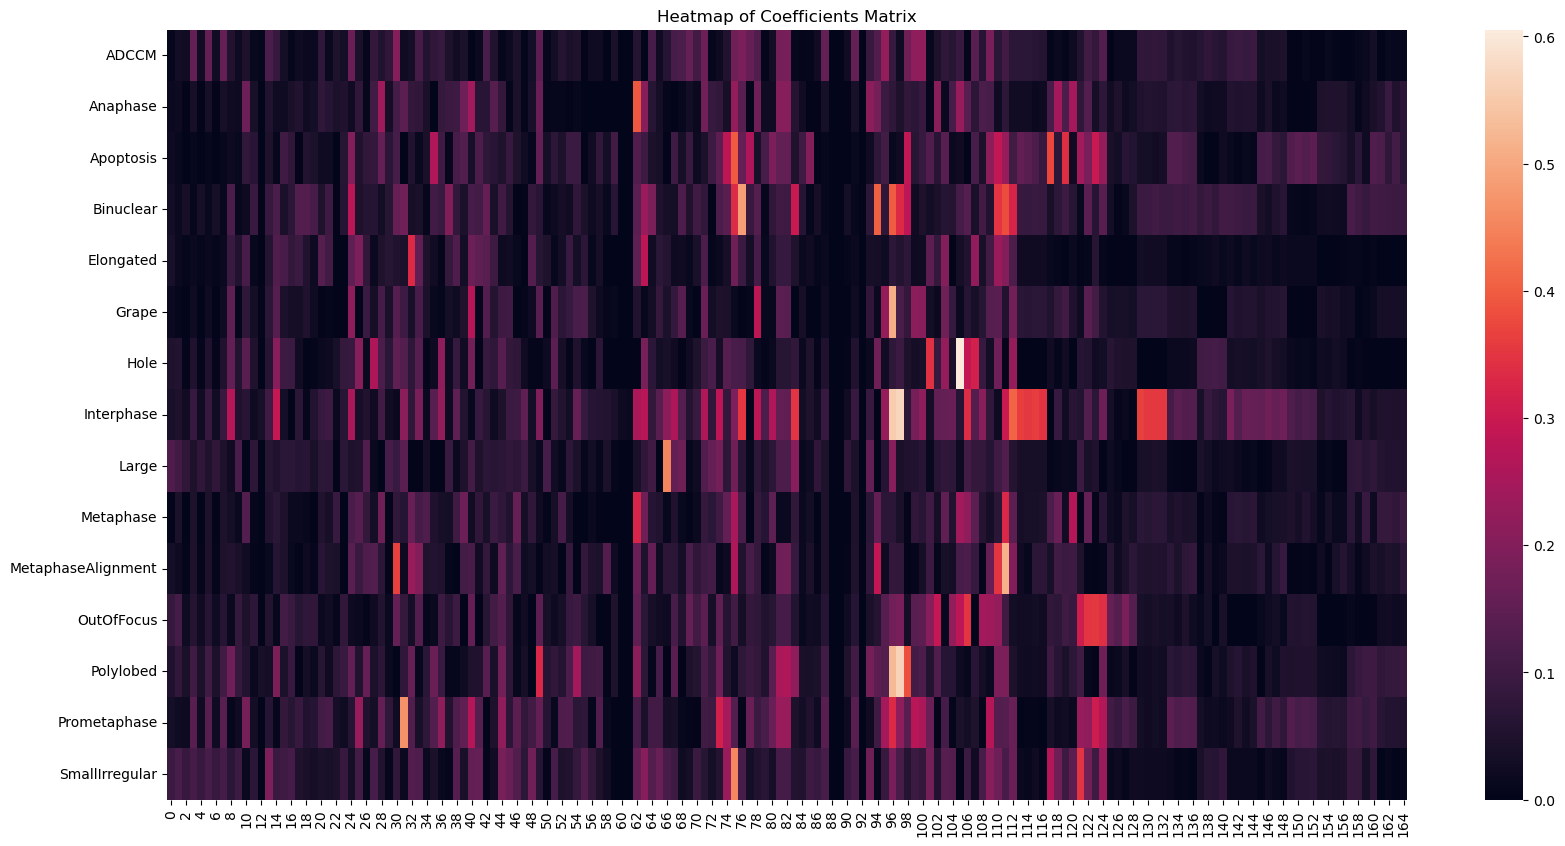

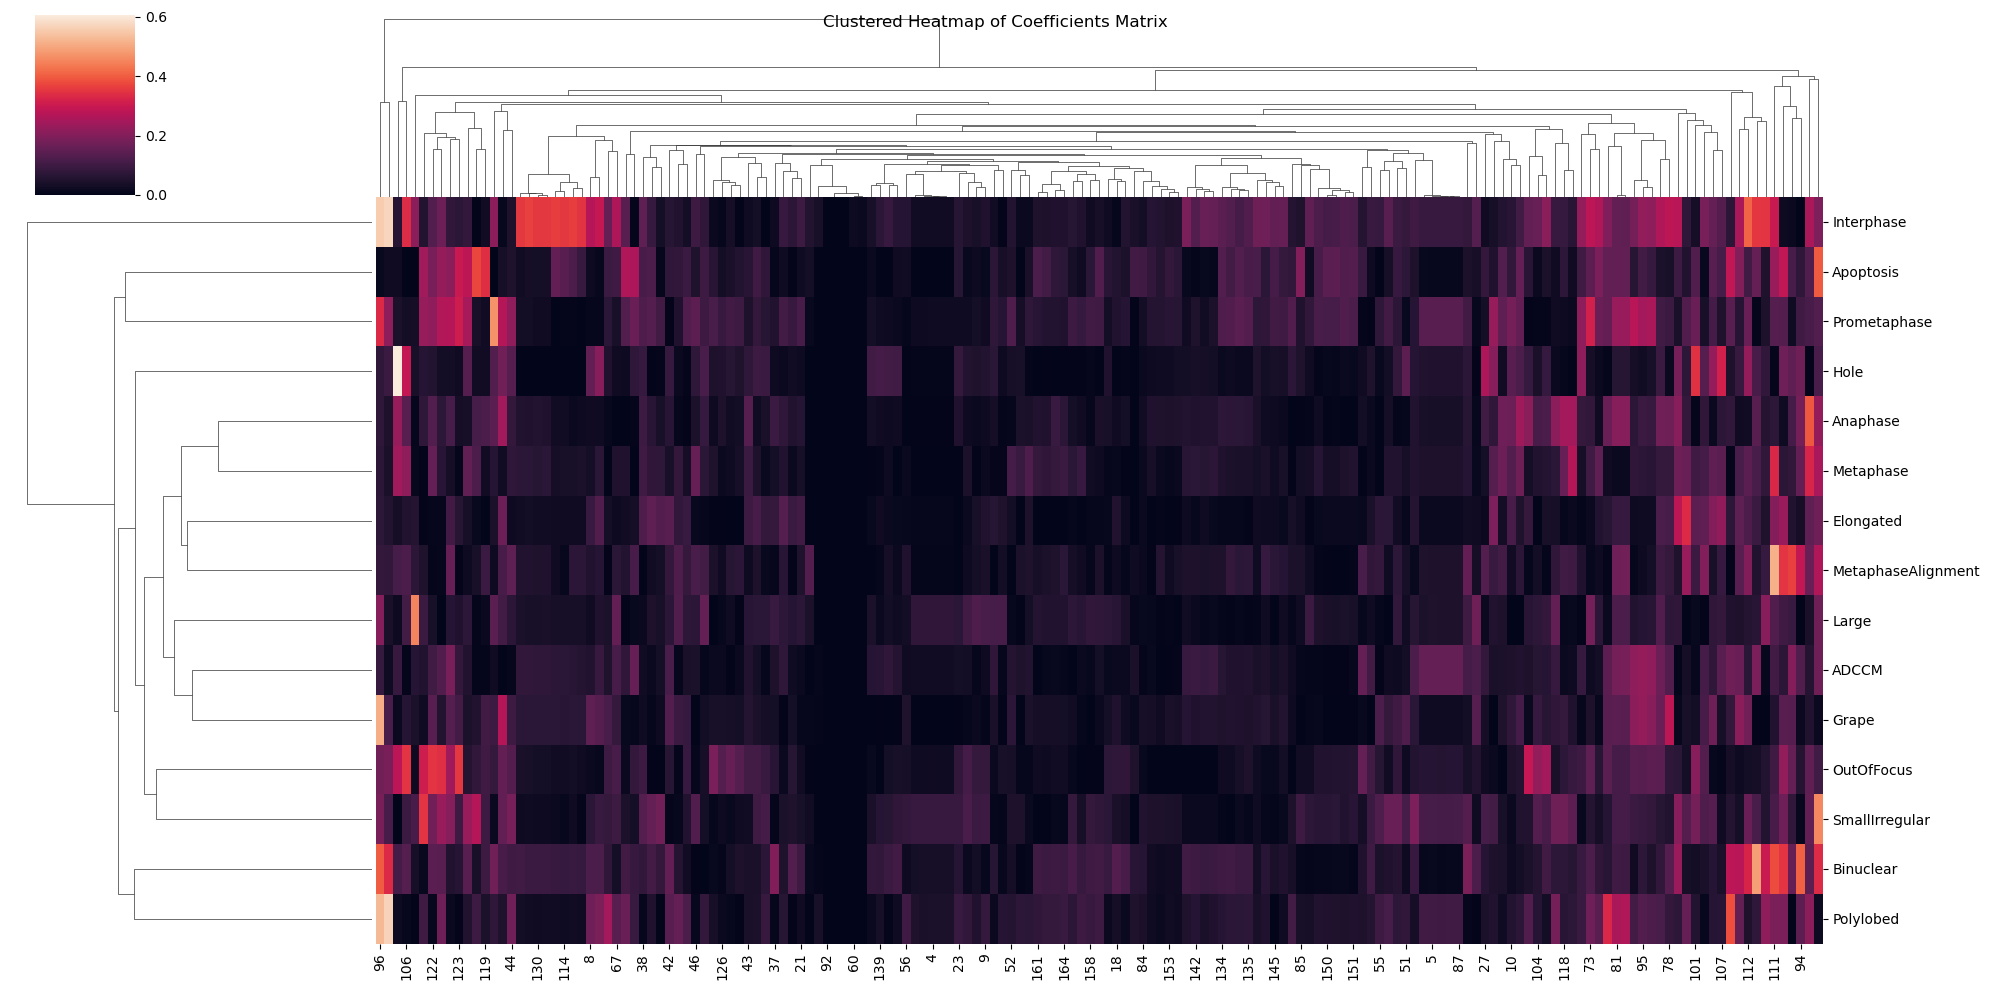

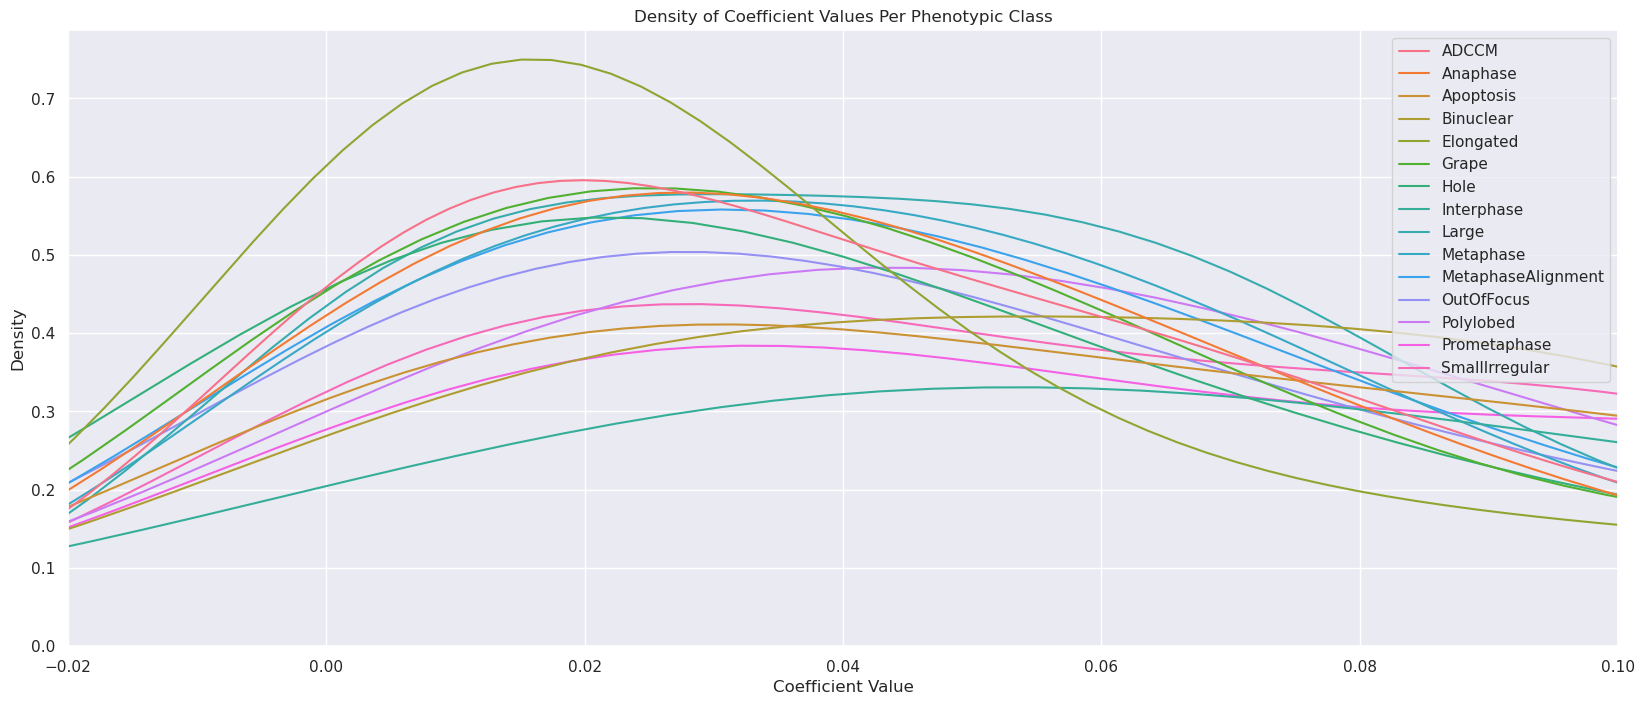

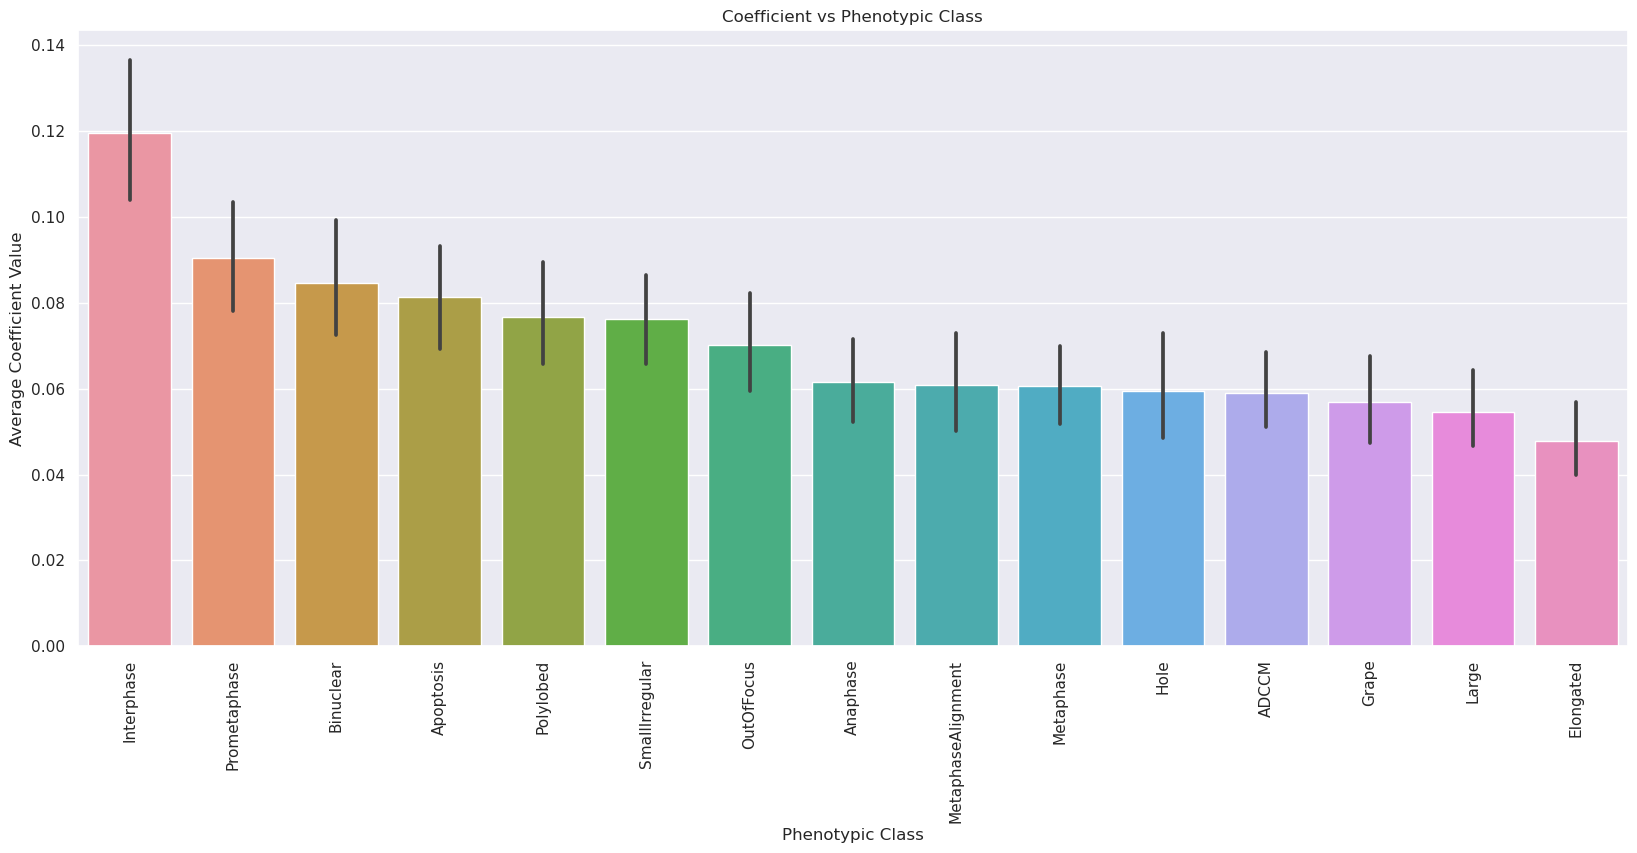

Interpreting model: final 
Trained with features: CP_and_DP
Shape of model coefficients(1445, 15)


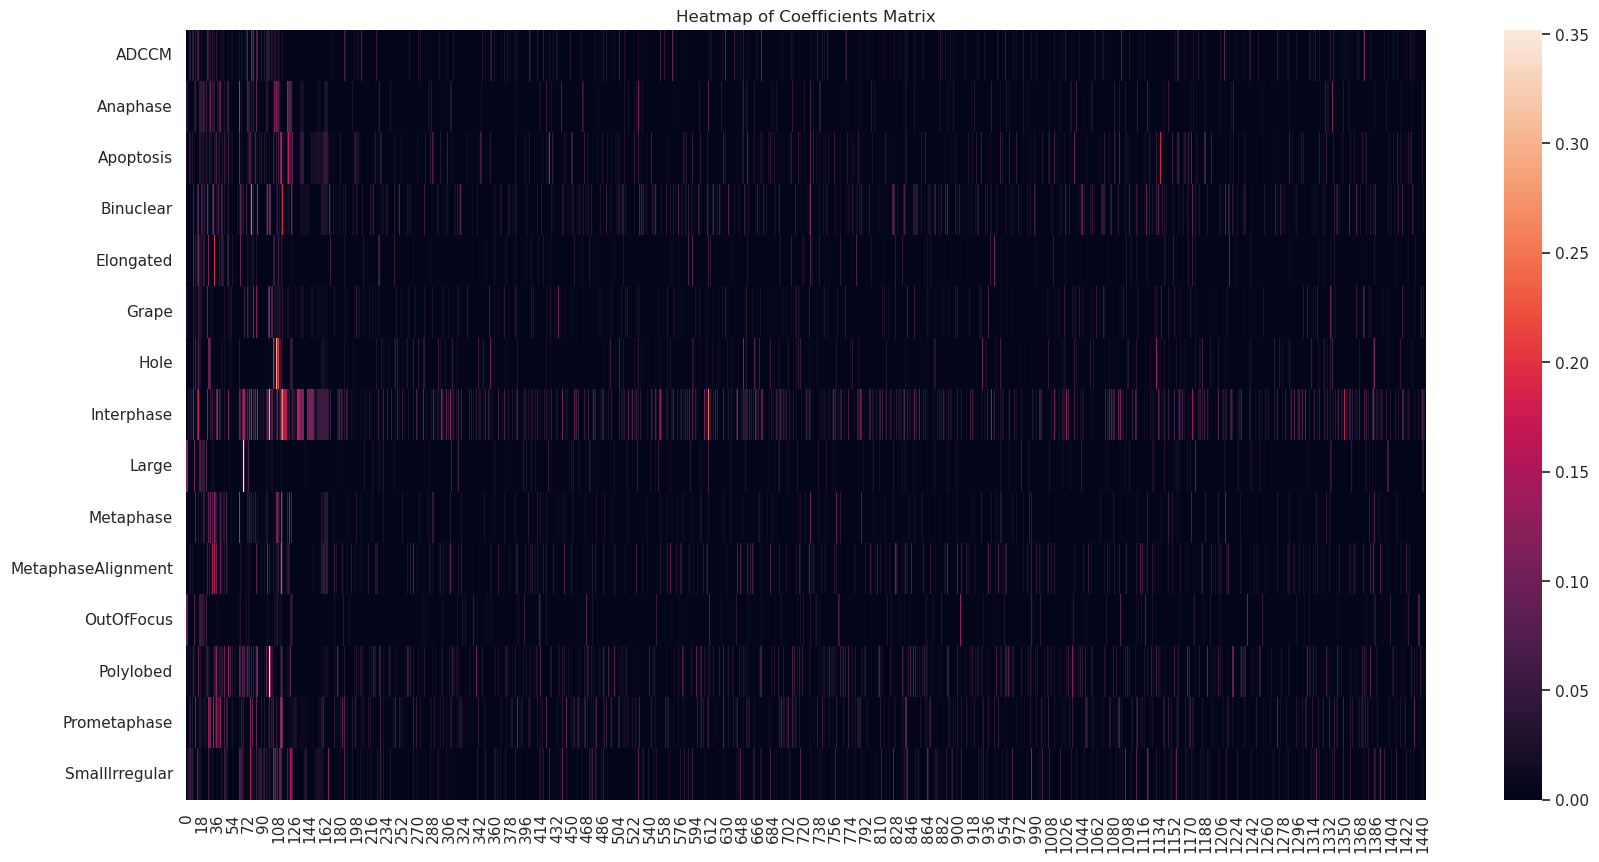

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


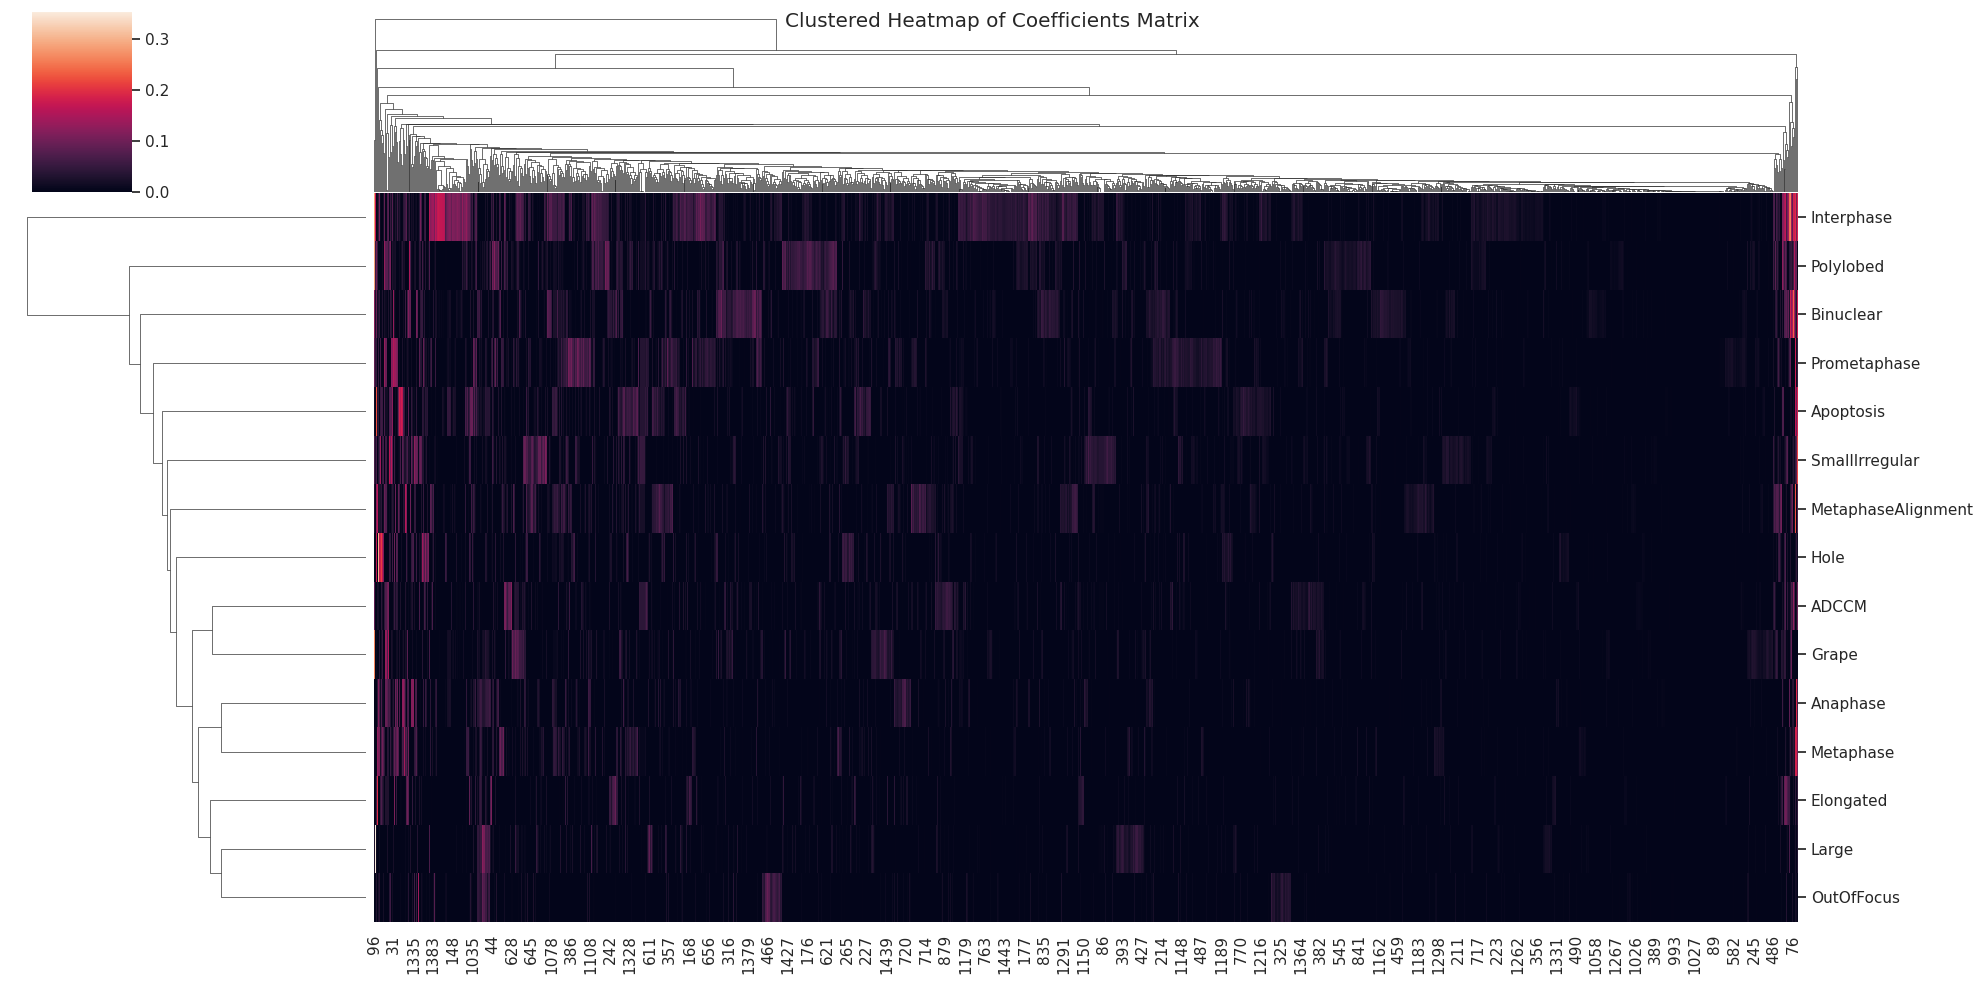

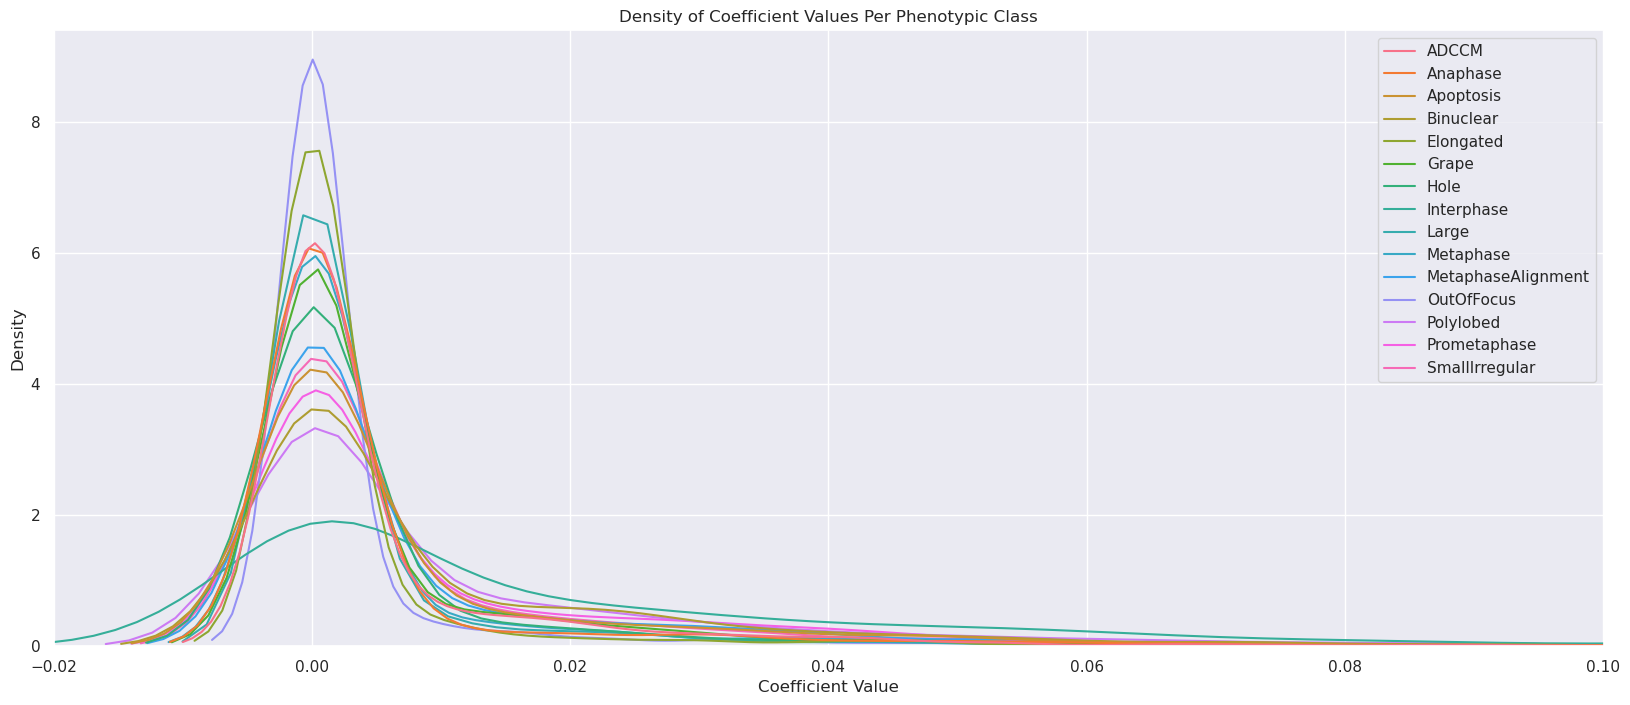

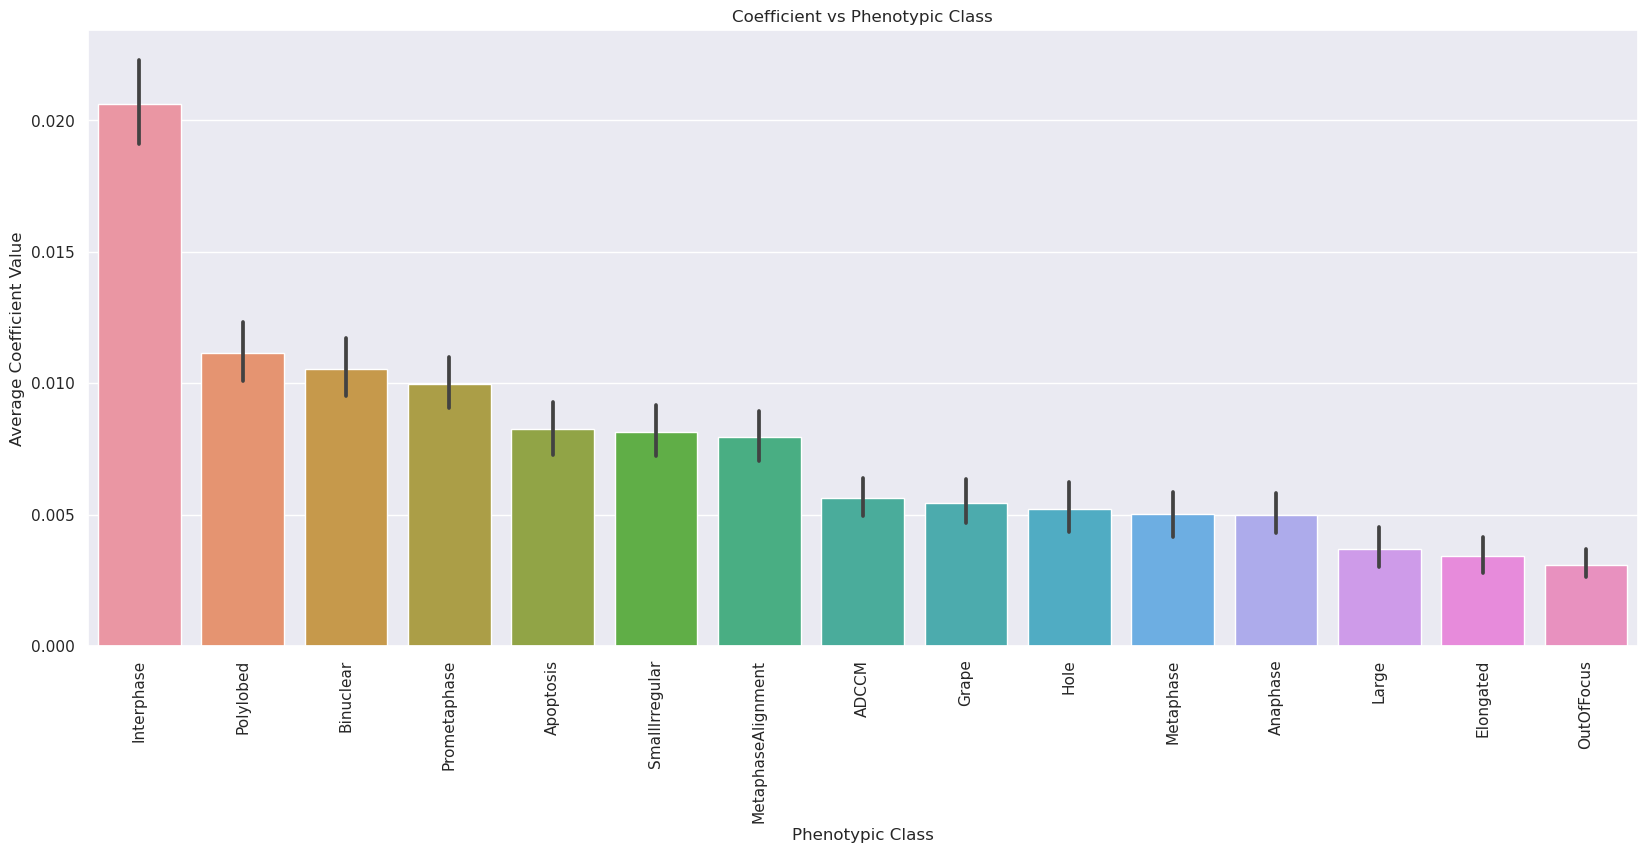

Interpreting model: final 
Trained with features: DP
Shape of model coefficients(1280, 15)


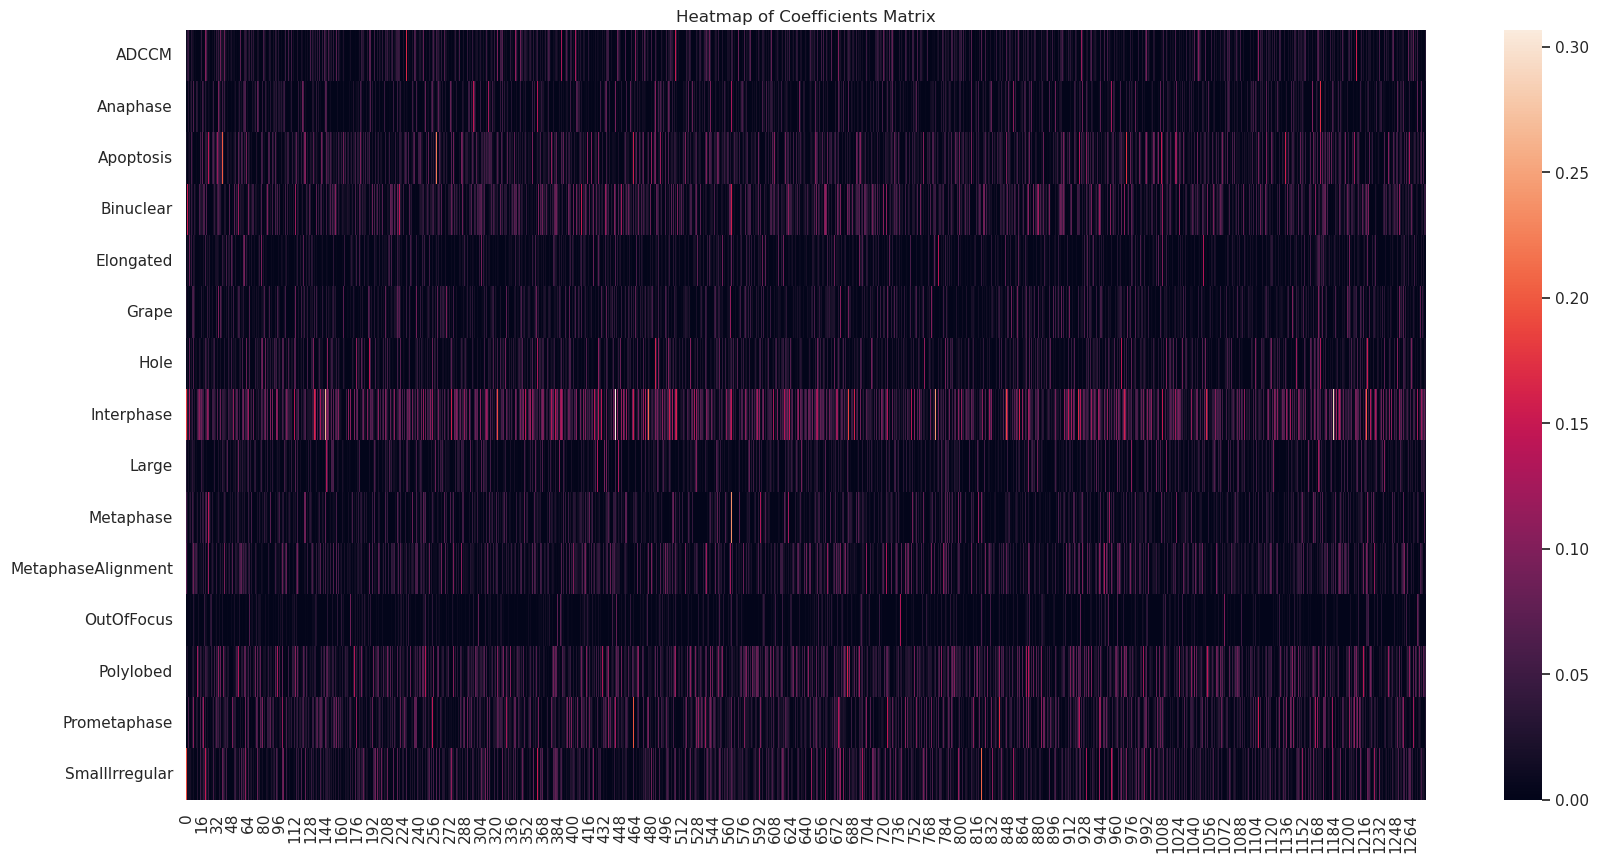

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


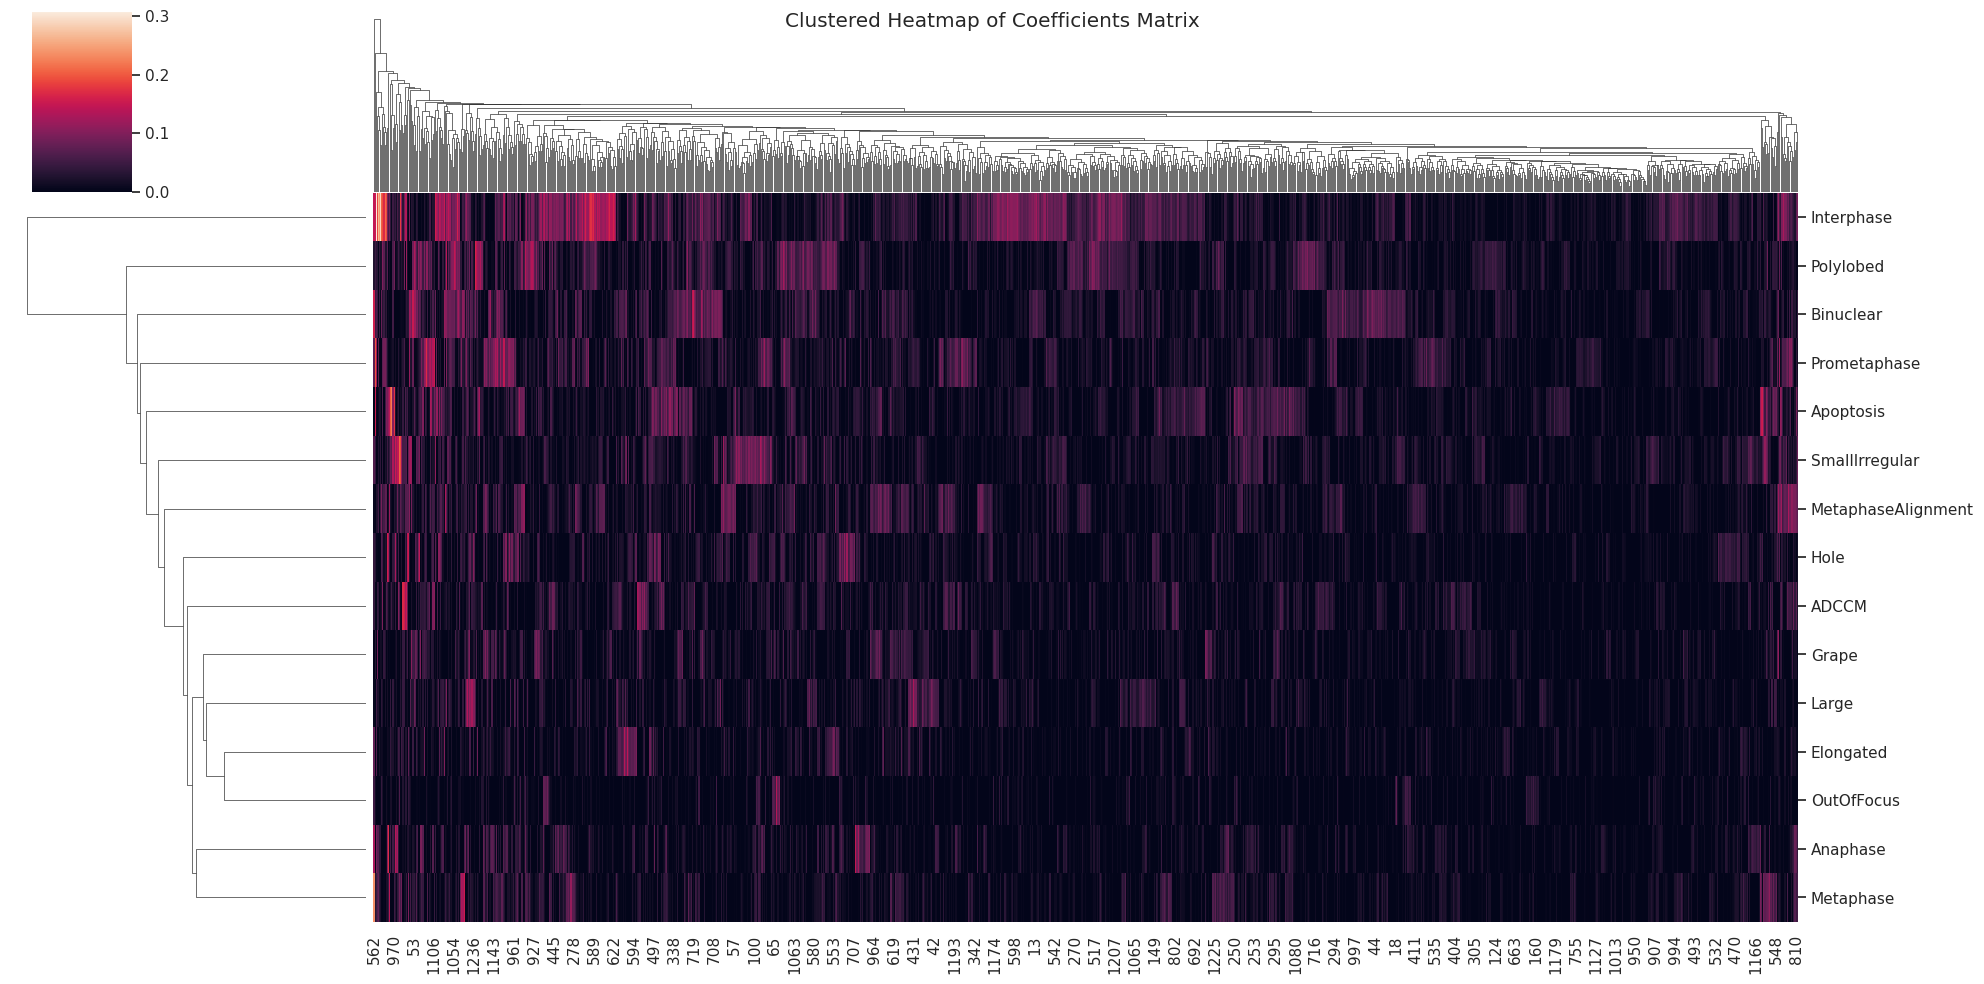

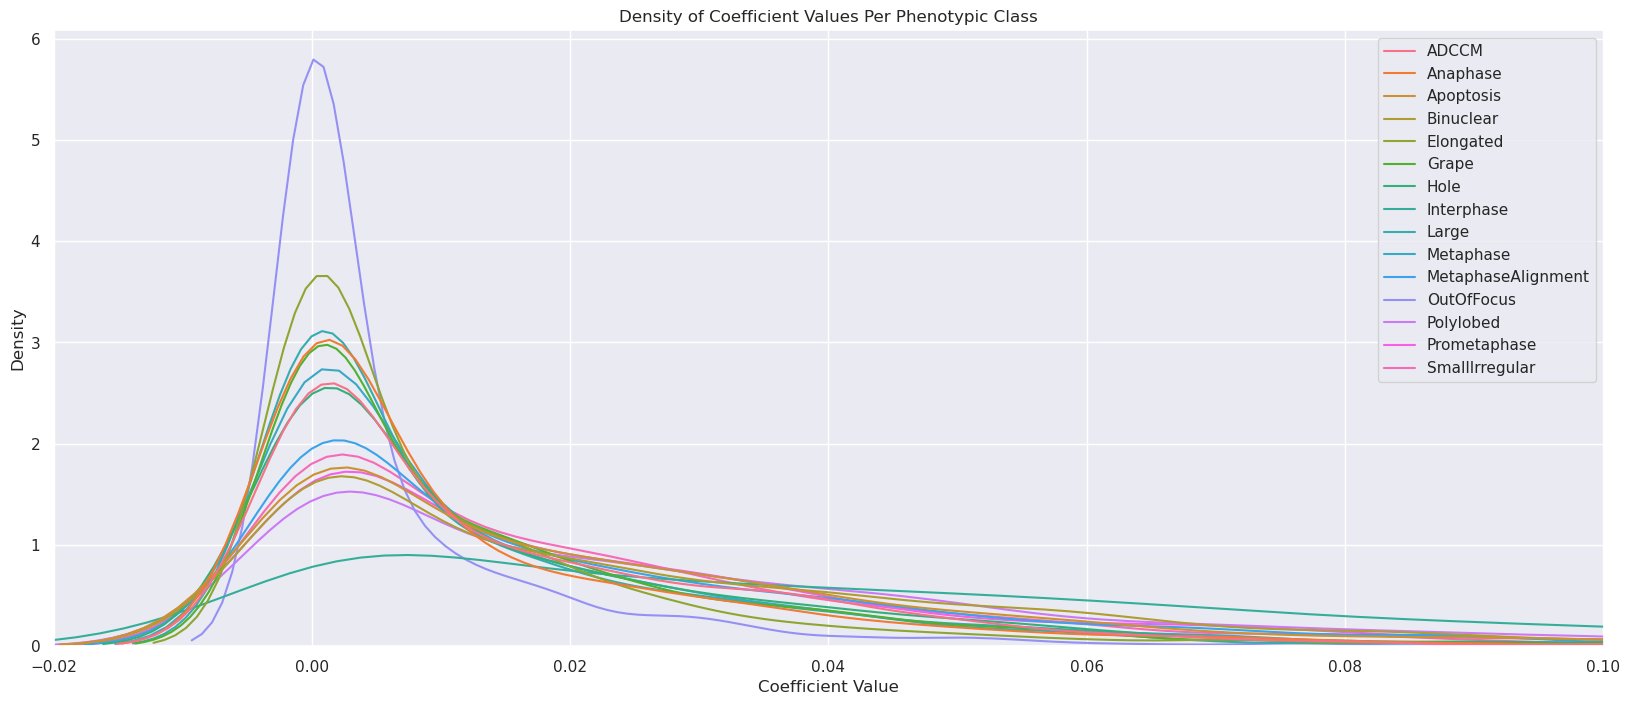

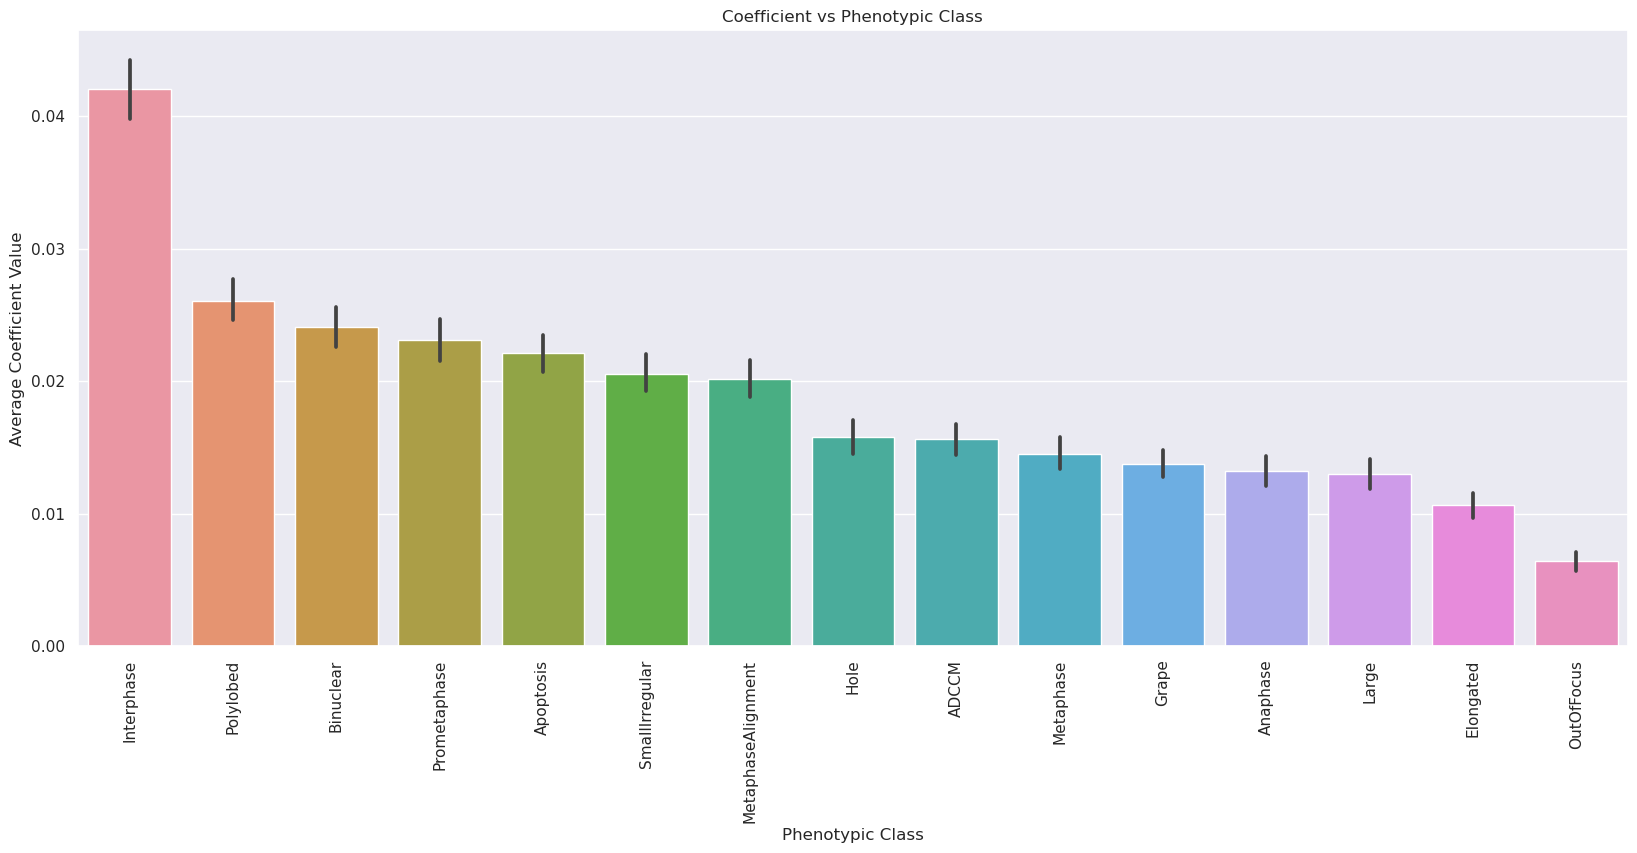

Interpreting model: shuffled_baseline 
Trained with features: CP
Shape of model coefficients(165, 15)


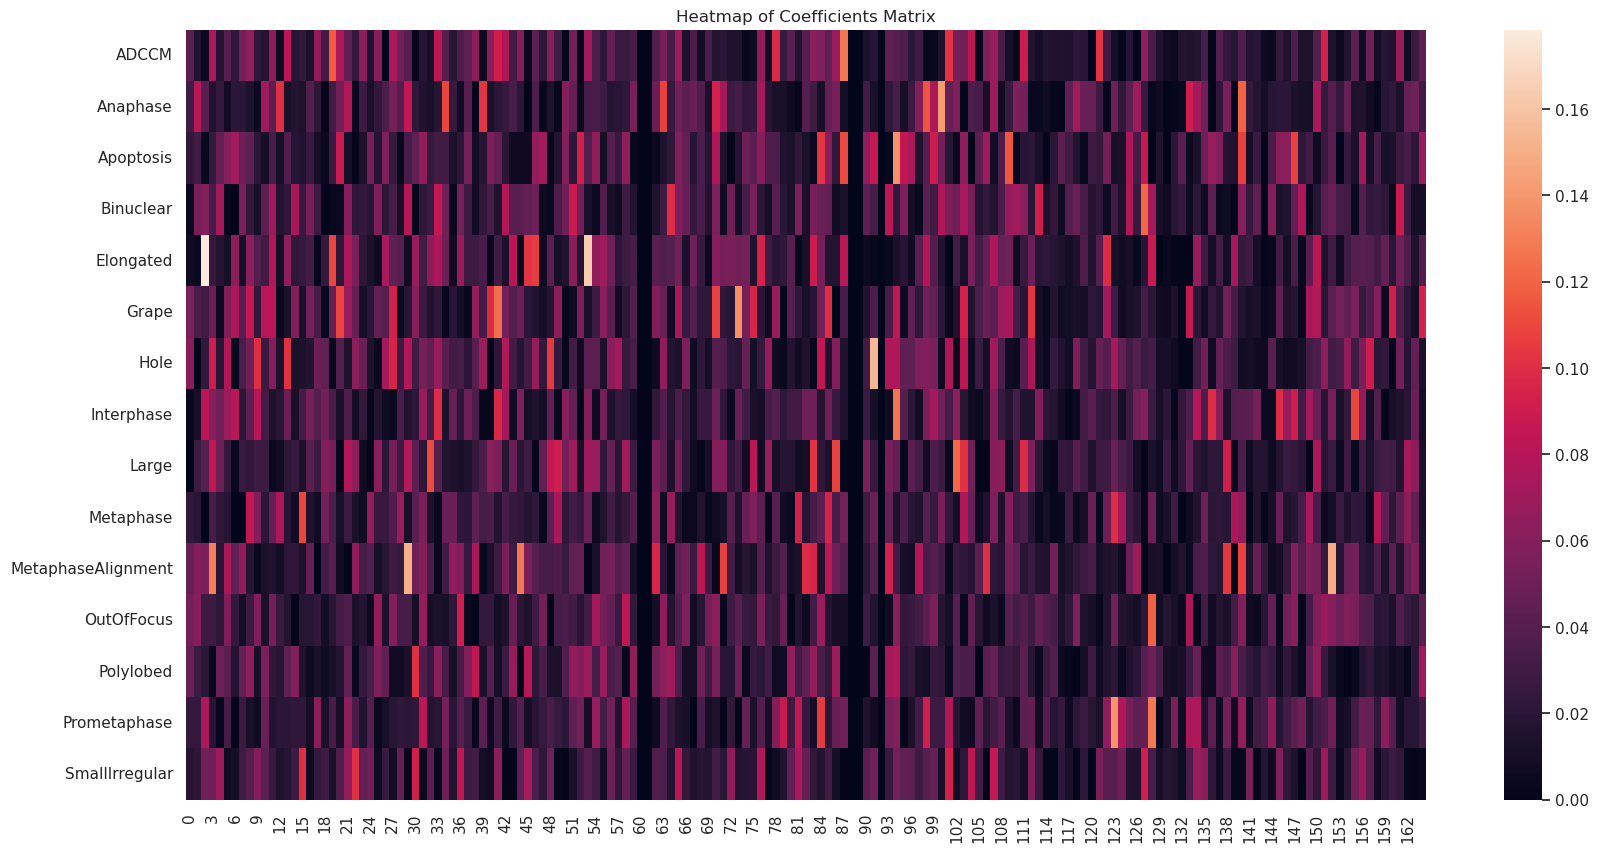

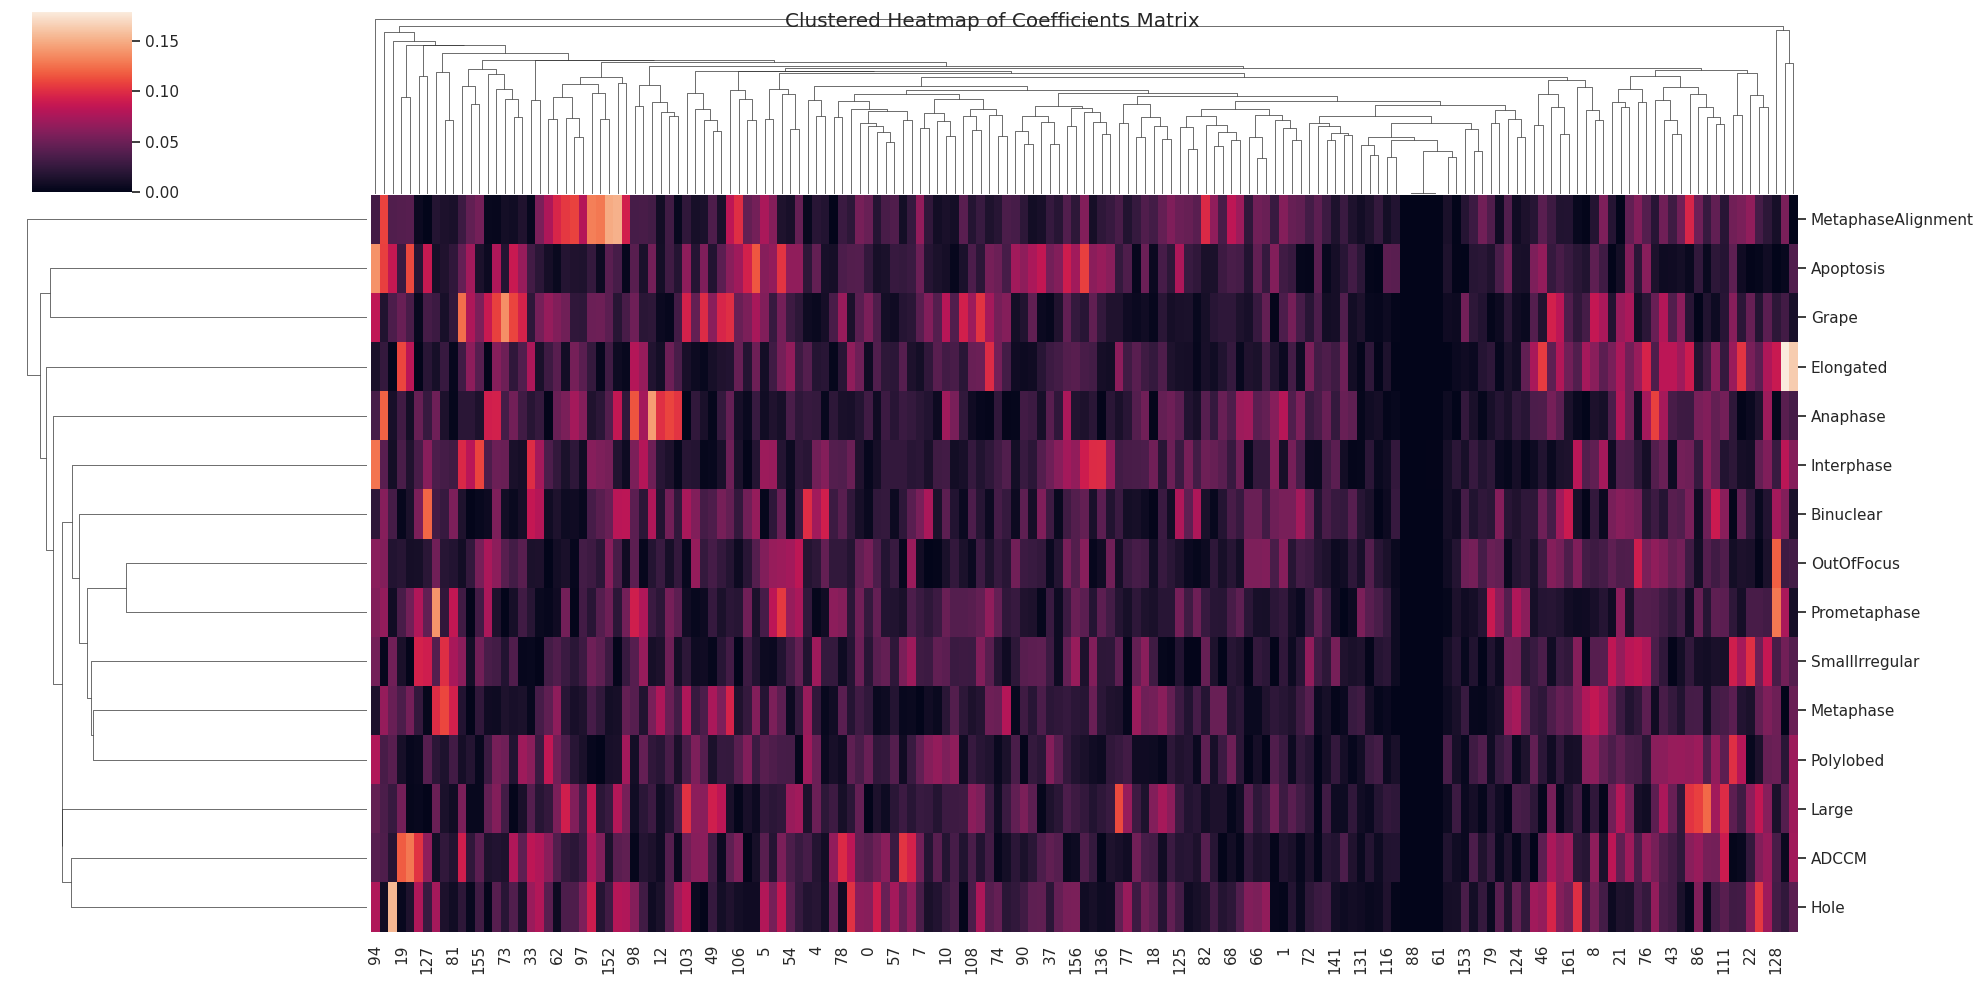

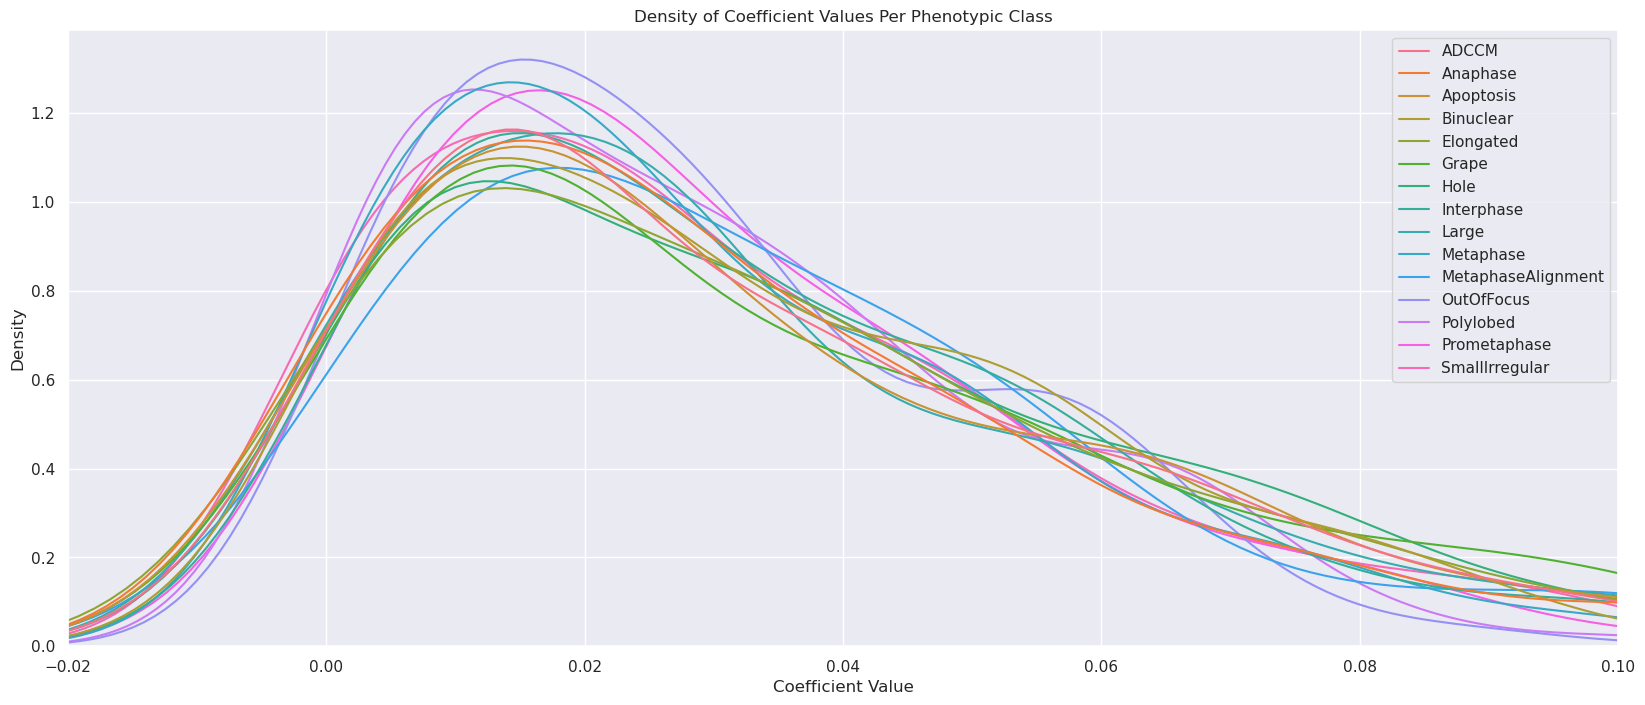

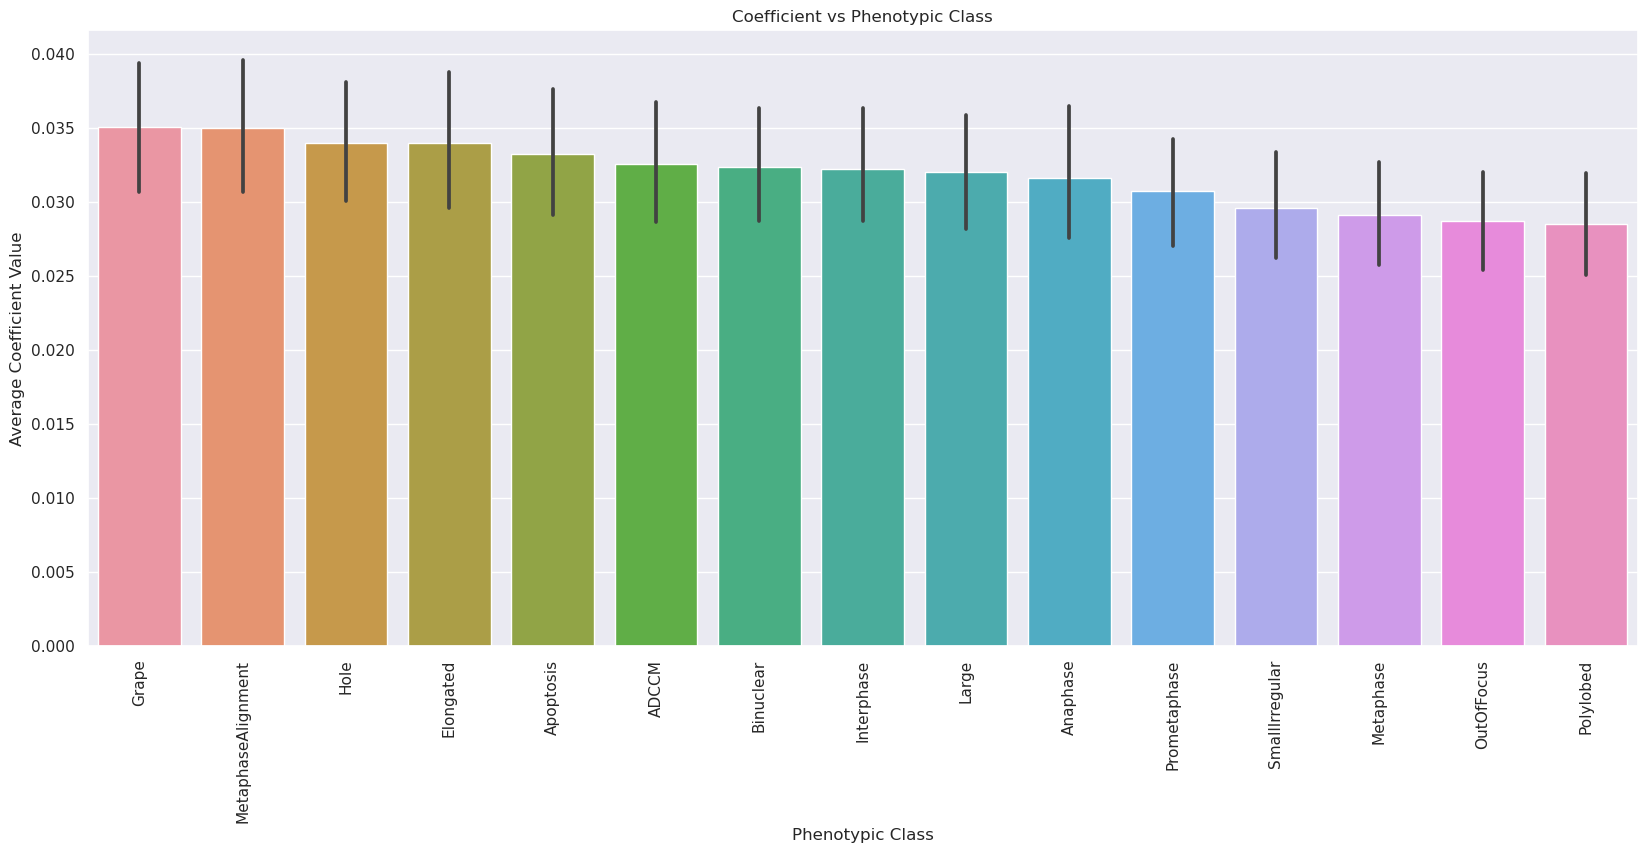

Interpreting model: shuffled_baseline 
Trained with features: CP_and_DP
Shape of model coefficients(1445, 15)


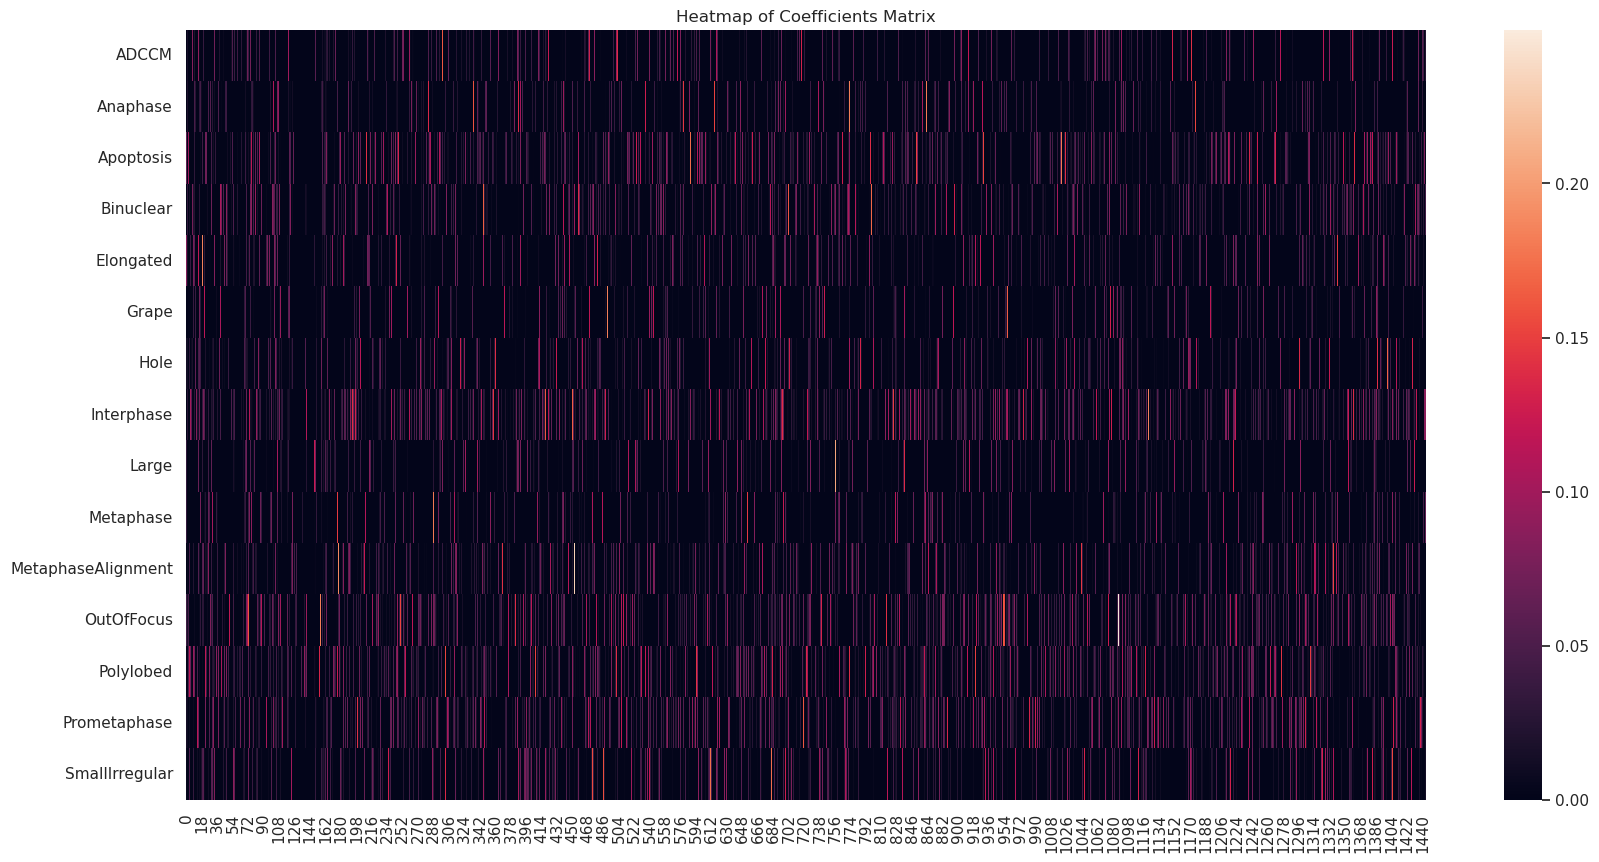

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


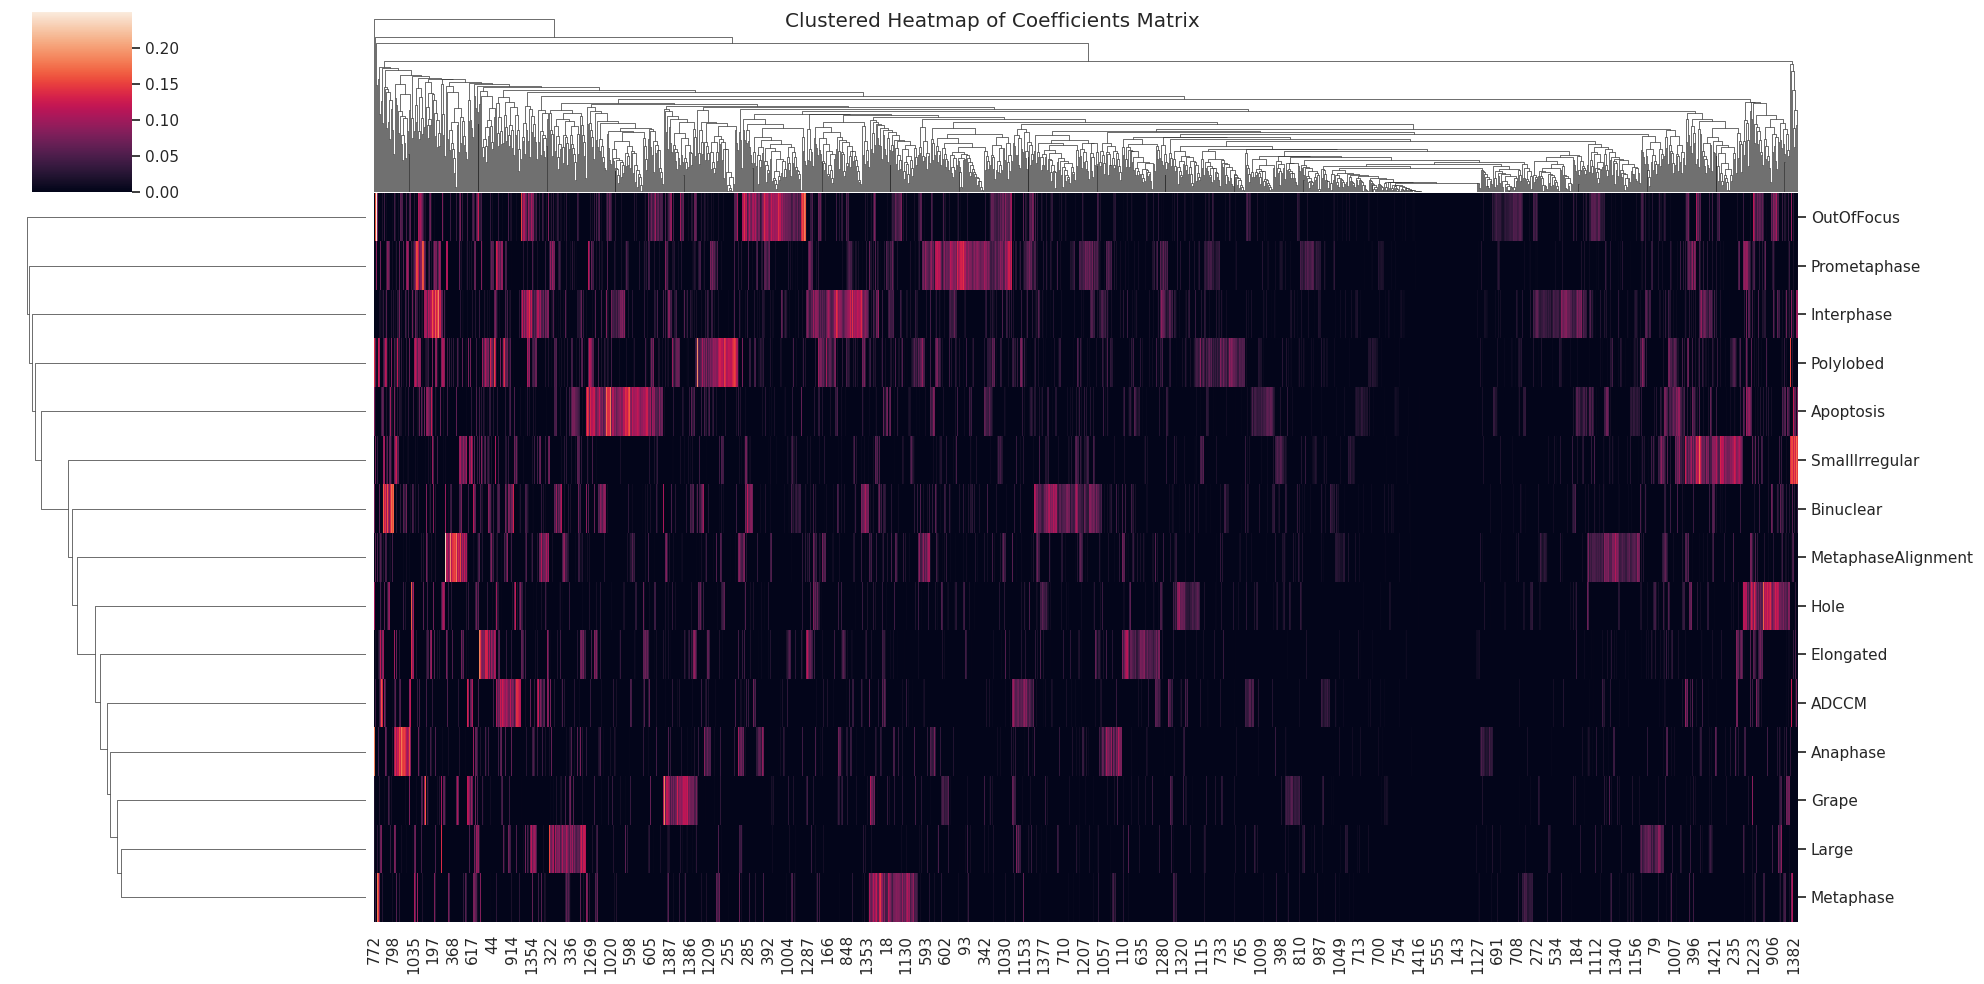

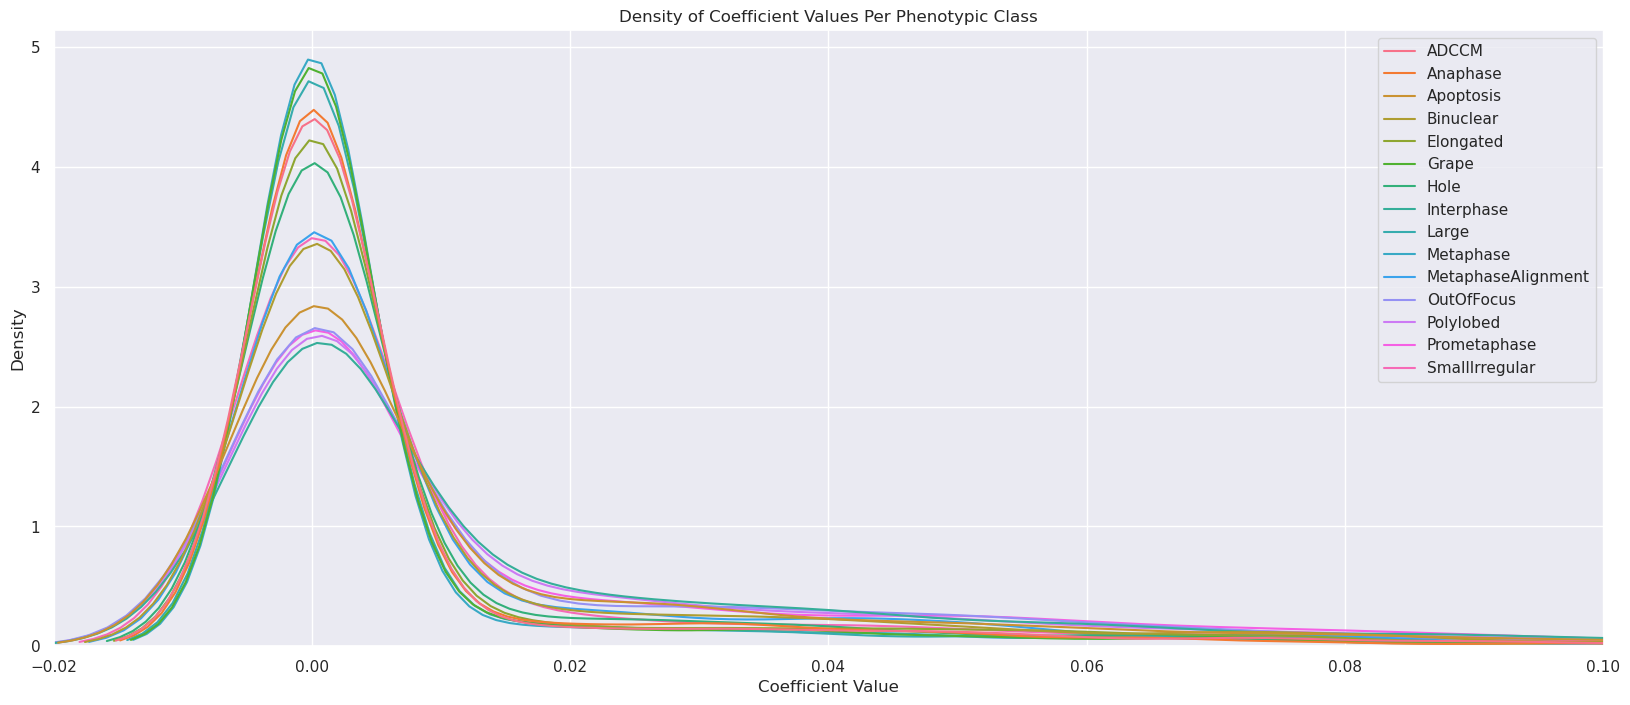

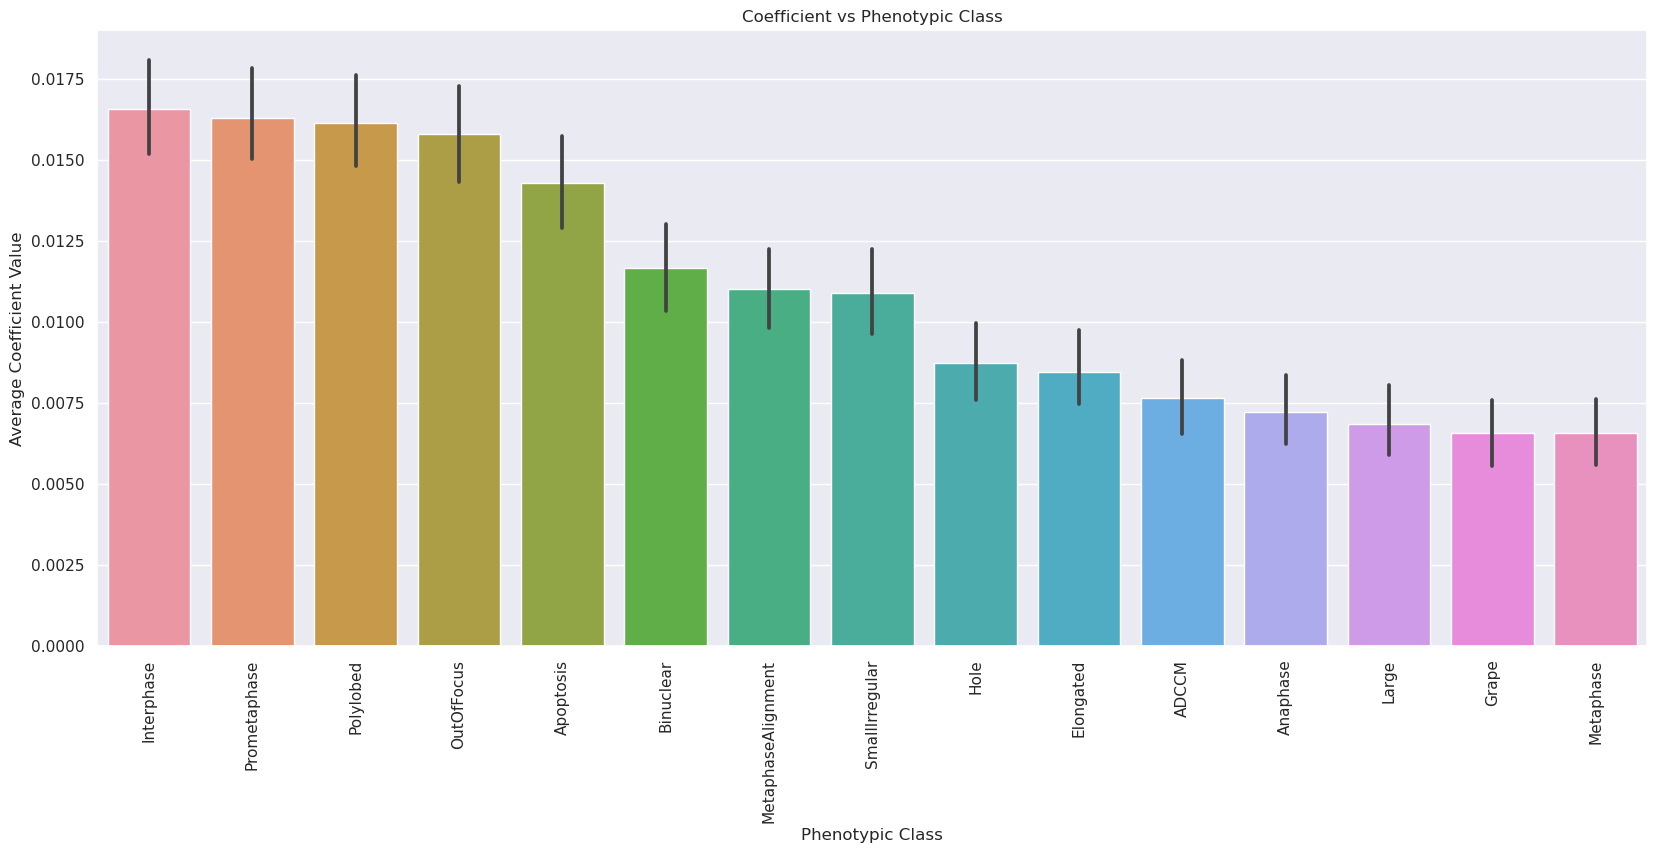

Interpreting model: shuffled_baseline 
Trained with features: DP
Shape of model coefficients(1280, 15)


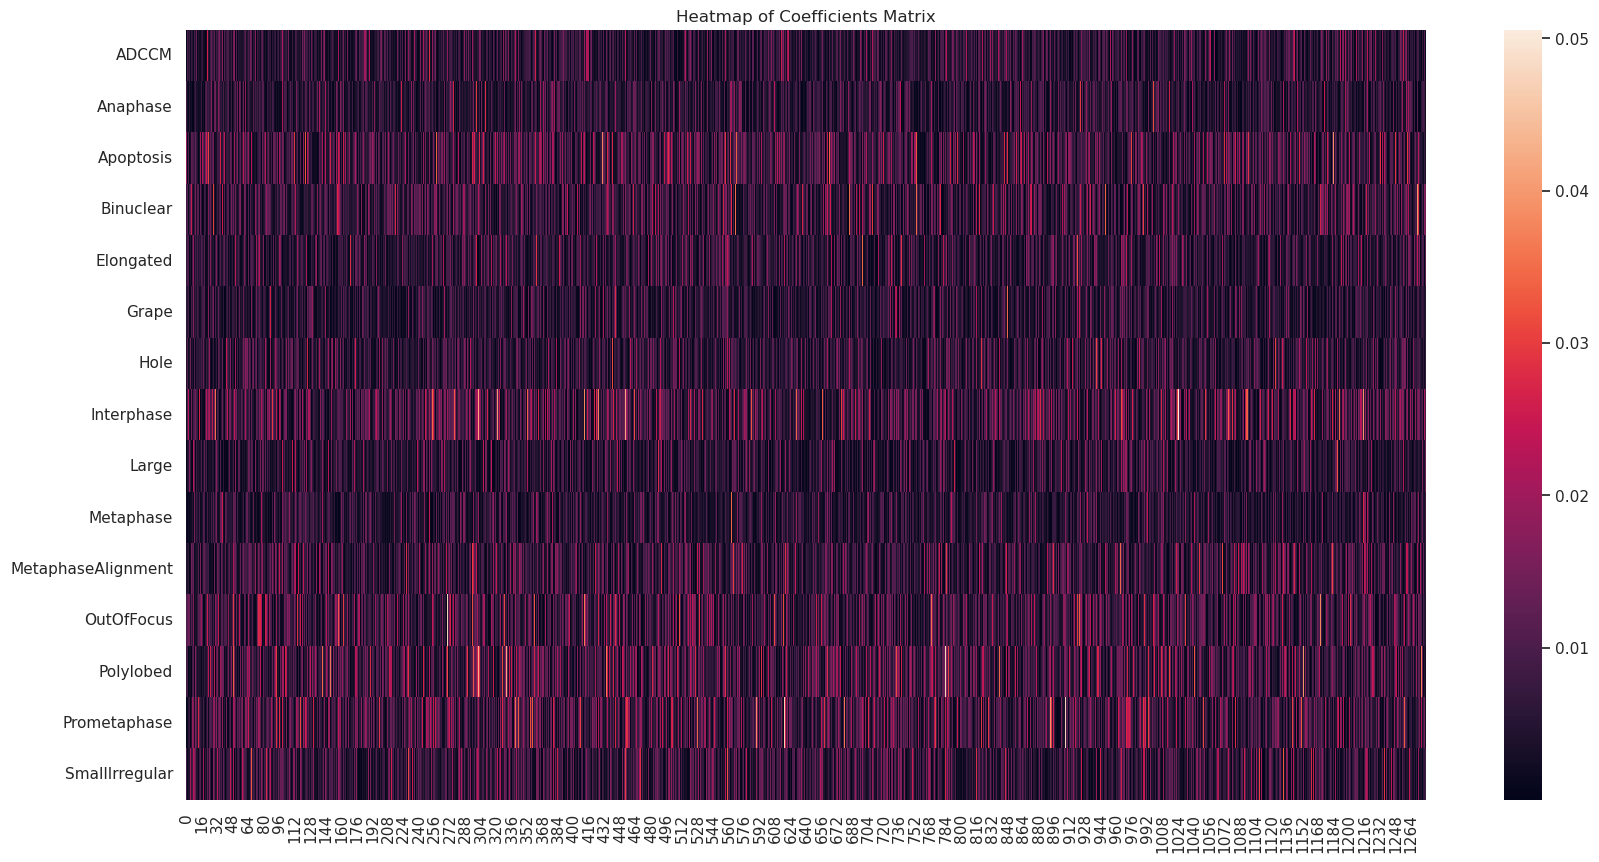

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


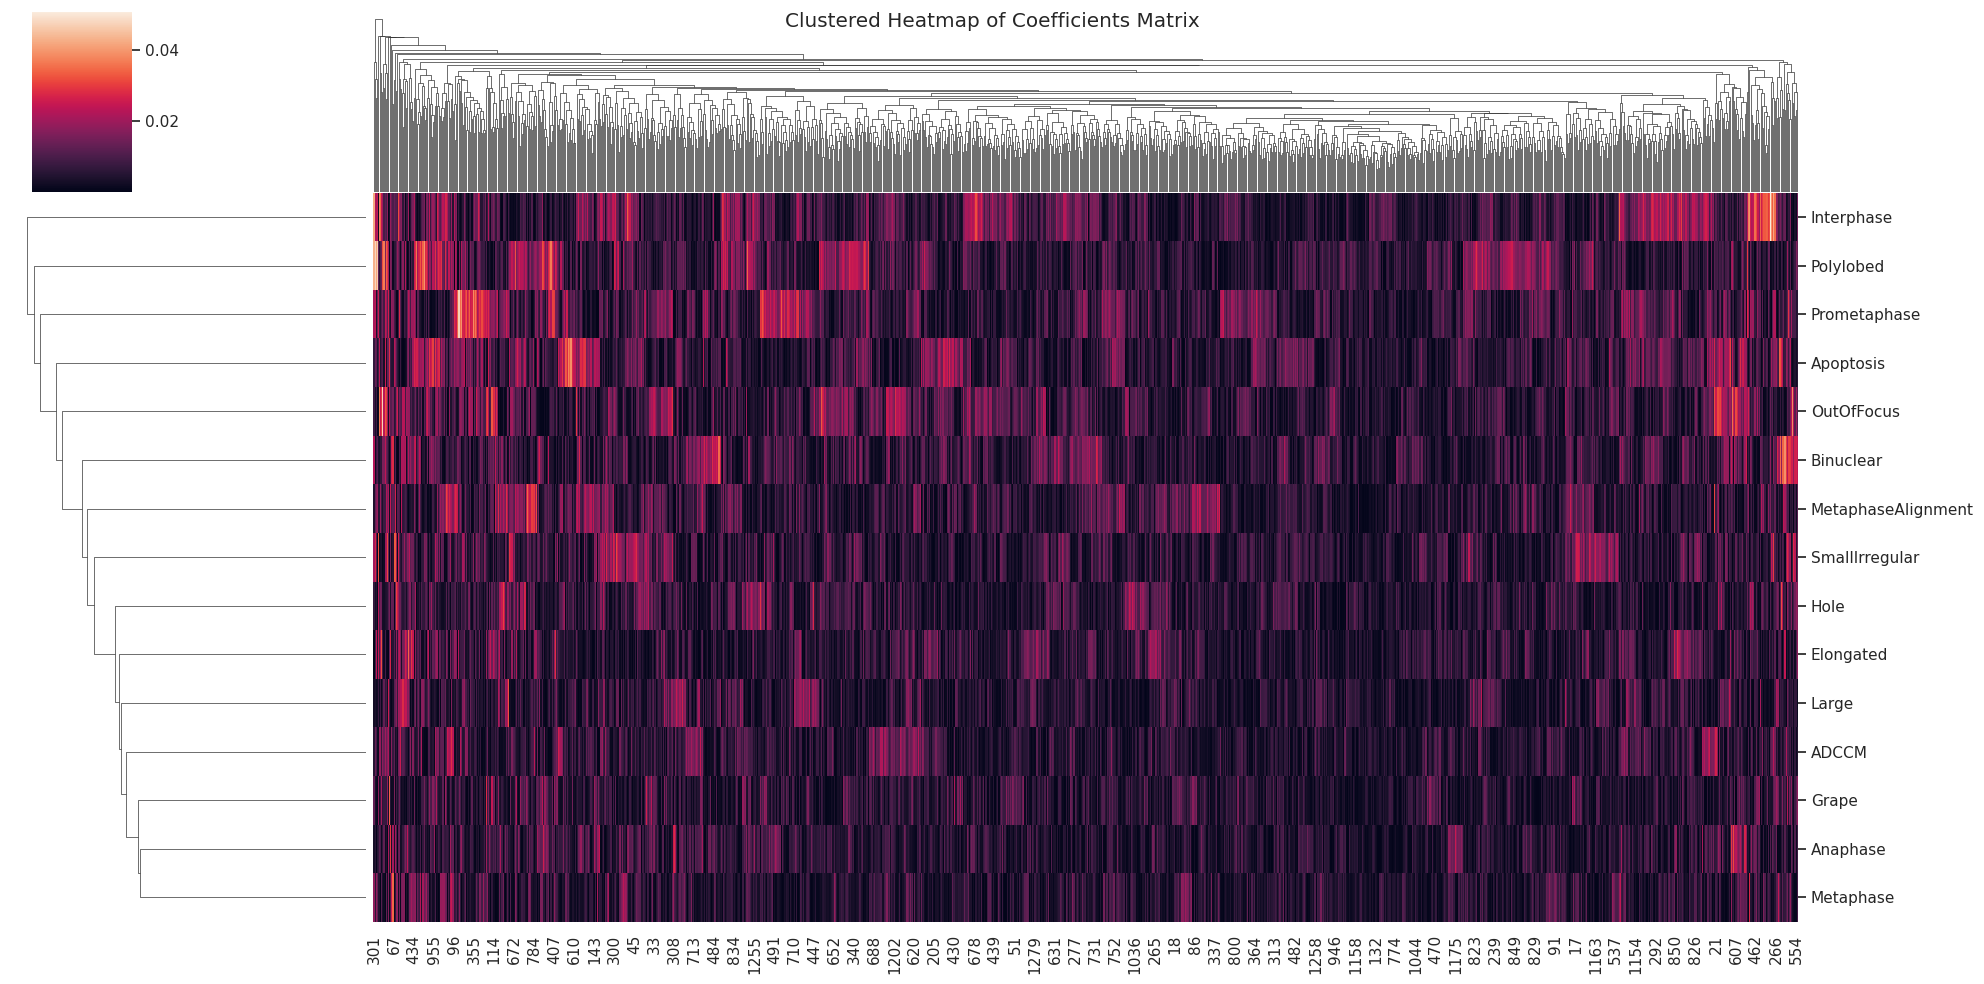

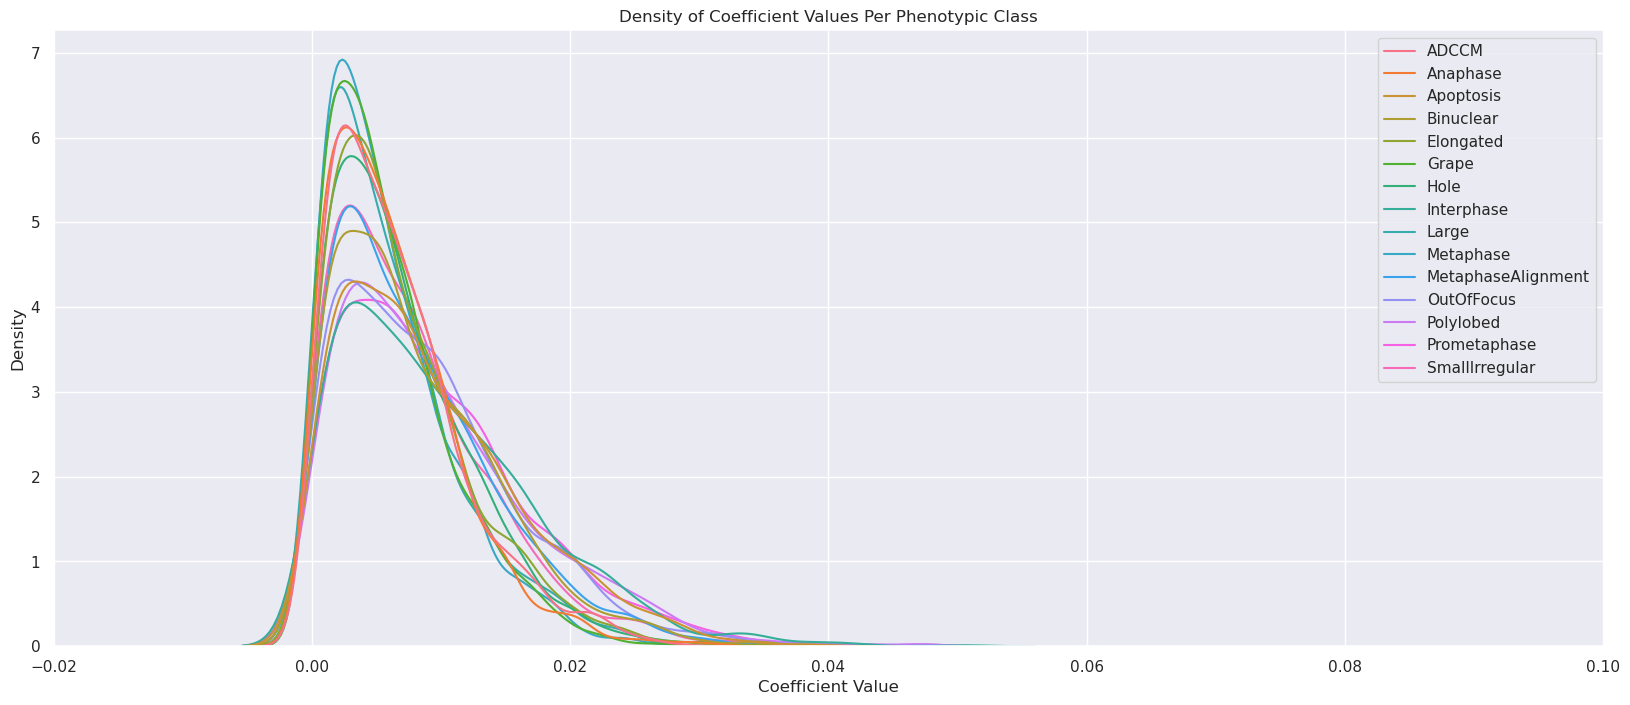

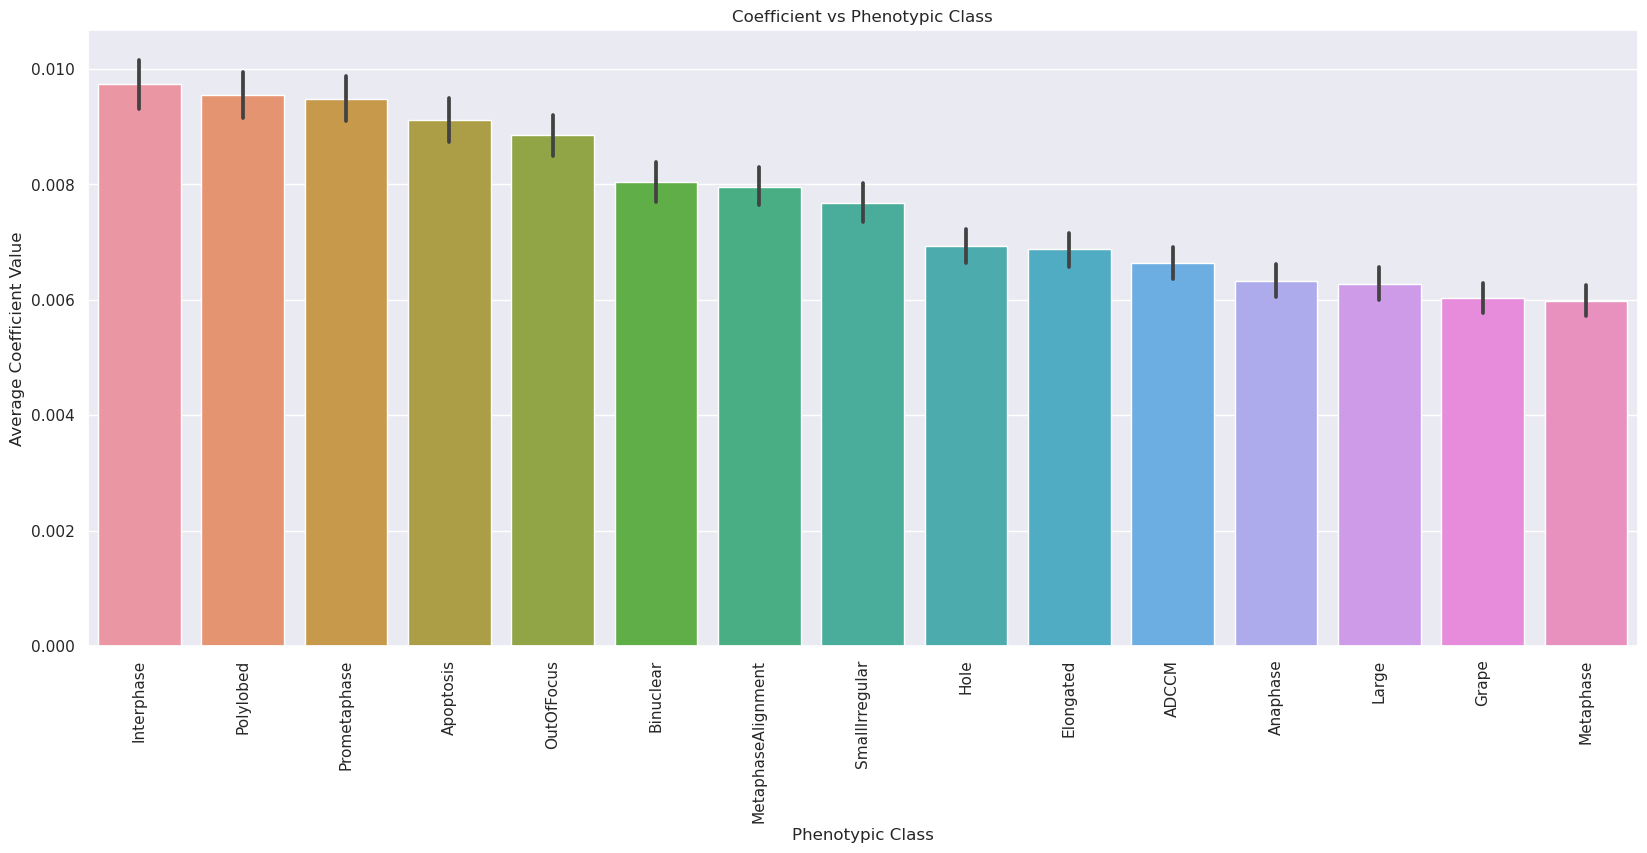

In [3]:
# directory to save models to
coefs_save_directory = pathlib.Path(f"coefficients/")
coefs_save_directory.mkdir(parents=True, exist_ok=True)

# directory to load the models from
models_dir = pathlib.Path("../2.train_model/models/")

# use a list to keep track of scores in tidy long format for each model and dataset combination
compiled_class_PR_curves = []

# iterate through each model (final model, shuffled baseline model, etc)
# sorted so final models are shown before shuffled_baseline
for model_path in sorted(models_dir.iterdir()):
    # load model
    model = load(model_path)
    # determine model/feature type from model file name
    model_type = model_path.name.split("__")[0]
    feature_type = model_path.name.split("__")[1].replace(".joblib", "")

    print(f"Interpreting model: {model_type} \nTrained with features: {feature_type}")

    # get model coefficients and reshape them into a more useable format
    coefs = np.abs(model.coef_)
    coefs = pd.DataFrame(coefs).T
    coefs.columns = model.classes_
    print(f"Shape of model coefficients{coefs.shape}")

    # restructure/rename dataframe to tidy long format (see preview below)
    tidy_data = coefs.stack()
    tidy_data = pd.DataFrame(tidy_data).reset_index(level=[0, 1])
    tidy_data.columns = ["Feature_Name", "Phenotypic_Class", "Value"]

    # add feature names to coefficientss dataframe
    # feature names depends on feature type
    all_cols = labeled_data.columns.tolist()
    # get DP,CP, or both features from all columns depending on desired dataset
    if feature_type == "CP":
        feature_cols = [col for col in all_cols if "CP__" in col]
    elif feature_type == "DP":
        feature_cols = [col for col in all_cols if "DP__" in col]
    elif feature_type == "CP_and_DP":
        feature_cols = [col for col in all_cols if "P__" in col]
    # add repeats to feature cols equal to the number of classes
    feature_names = [col for col in feature_cols for i in range(len(model.classes_))]
    tidy_data["Feature_Name"] = feature_names

    # save tidy coefficients dataframe
    coefs_save_path = pathlib.Path(
        f"{coefs_save_directory}/{model_type}__{feature_type}__coefficients.tsv"
    )
    tidy_data.to_csv(coefs_save_path, sep="\t")

    # display heatmap of average coefs
    plt.figure(figsize=(20, 10))
    plt.title("Heatmap of Coefficients Matrix")
    ax = sns.heatmap(data=coefs.T)
    plt.show()

    # display clustered heatmap of coefficients
    ax = sns.clustermap(
        data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True
    )
    ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")
    plt.show()

    # display density plot for coefficient values of each class
    sns.set(rc={"figure.figsize": (20, 8)})
    plt.xlim(-0.02, 0.1)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Density")
    plt.title("Density of Coefficient Values Per Phenotypic Class")
    ax = sns.kdeplot(data=coefs)
    plt.show()

    # display average coefficient value vs phenotypic class bar chart
    pheno_class_ordered = coefs.reindex(
        coefs.mean().sort_values(ascending=False).index, axis=1
    )
    sns.set(rc={"figure.figsize": (20, 8)})
    plt.xlabel("Phenotypic Class")
    plt.ylabel("Average Coefficient Value")
    plt.title("Coefficient vs Phenotypic Class")
    plt.xticks(rotation=90)
    ax = sns.barplot(data=pheno_class_ordered)
    plt.show()